# Unit 2: Lesson 1: Preparation for Modelling

## Pollutants in California
### Thinkful Challenge
Eva Rubin
12 October 2018


### data source: https://www.kaggle.com/florinlanger/cal-facilities/home

## Categorical Variables:

County: 58 Counties (https://www.arb.ca.gov/ei/maps/2017statemap/cntymap.htm)

Air Basin: 15 (https://www.arb.ca.gov/ei/maps/2017statemap/abmap.htm)

Air Pollution Control District:  23 (https://www.arb.ca.gov/ei/maps/statemap/dismap.htm)

Zip Codes: 1518

## Continuous Variables:
TOGT: Total organic gases consist of all hydrocarbons, i.e. compounds containing hydrogen and carbon with or without other chemical elements.

ROGT: Reactive organic gases include all the organic gases exclude methane, ethane, acetone, methyl acetate, methylated siloxanes, and number of low molecular weight halogenated organics that have a low rate of reactivity.

COT: The emissions of CO are for the single species, carbon monoxide.

NOXT: The emissions of NOx gases (mostly nitric oxide and nitrogen dioxide) are reported as equivalent amounts of NO2.

SOXT: The emissions of SOx gases (sulfur dioxide and sulfur trioxide) are reported as equivalent amounts of SO2.

PMT: Particulate matter refers to small solid and liquid particles such as dust, sand, salt spray, metallic and mineral particles, pollen, smoke, mist and acid fumes.

PM10T: PM10 refers to the fraction of particulate matter with an aerodynamic diameter of 10 micrometer and smaller. These particles are small enough to penetrate the lower respiratory tract.

## Missing Data:

FNAME       1

FZIP     1387

TOGT     1392

ROGT     1384

COT      8856

NOXT     8714

SOXT     9575

PMT      6621

PM10T    6621


## Variance in Data:
- High variance in numbers of facilities per County
- High variance in tons of each pollutant emitted within distinct Counties and Air Basins

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import math
from scipy import stats
from scipy.stats import norm, kstest
from matplotlib.mlab import PCA as mlabPCA
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

plt.rcParams['figure.figsize'] = (50.0, 20.0)
plt.rcParams.update({'font.size': 22})

In [27]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.0.


In [28]:
df_orig = pd.read_csv("https://www.arb.ca.gov/app/emsinv/facinfo/faccrit_output.csv?&dbyr=2016&ab_=&dis_=&co_=")
    

In [29]:
df_orig.columns

Index(['CO', 'AB', 'FACID', 'DIS', 'FNAME', 'FSTREET', 'FCITY', 'FZIP', 'FSIC',
       'COID', 'DISN', 'CHAPIS', 'CERR_CODE', 'TOGT', 'ROGT', 'COT', 'NOXT',
       'SOXT', 'PMT', 'PM10T'],
      dtype='object')

In [5]:
df_orig.head()

,CO,AB,FACID,DIS,FNAME,FSTREET,FCITY,FZIP,FSIC,COID,DISN,CHAPIS,CERR_CODE,TOGT,ROGT,COT,NOXT,SOXT,PMT,PM10T
0,41,SF,20311,BA,CITY OF BRISBANE CITY HALL,50 PARK PLACE,BRISBANE,94005,9229,SM,BAY AREA AQMD,NaN,NaN,0.000019,0.000017,0.000078,0.000314,6.360000e-07,0.000012,0.000011
1,48,SV,1116,YS,TONY'S FINE FOODS,3575 REED AVENUE,WEST SACRAMENTO,95605,4931,SOL,YOLO-SOLANO AQMD,NaN,NaN,0.000000,0.000000,0.010000,0.080000,0.000000e+00,0.000000,0.000000
2,41,SF,18302,BA,"GOLD STAR AUTO BODY SHOP, INC","233 SO MAPLE AVENUE, #13",SOUTH SAN FRANCISCO,94080,7532,SM,BAY AREA AQMD,NaN,NaN,1.239401,1.116388,NaN,NaN,NaN,NaN,NaN
3,41,SF,18315,BA,LUCKY #726,45 MURCHISON DRIVE,MILLBRAE,94030,5411,SM,BAY AREA AQMD,NaN,NaN,0.036675,0.003414,0.005705,0.045110,7.539000e-06,0.000133,0.000133
4,41,SF,15253,BA,ORACLE CORPORATION,500 ORACLE PARKWAY,REDWOOD CITY,94065,4931,SM,BAY AREA AQMD,NaN,NaN,0.026129,0.022954,0.088511,0.350415,1.685090e-04,0.005150,0.004944


## Exploring the Data:

### 1. Shape: number of variables (columns), number of observations (rows)

In [6]:
# Get number of variables: 22,425 observations; 20 features (columns)
df_orig.shape

(22415, 20)

### 2. Missing data

In [7]:
# Identify missing data
df_orig.isnull().sum()

CO               0
AB               0
FACID            0
DIS              0
FNAME            1
FSTREET        143
FCITY          901
FZIP          1387
FSIC             0
COID             0
DISN             0
CHAPIS       22059
CERR_CODE    22121
TOGT          1392
ROGT          1384
COT           8856
NOXT          8714
SOXT          9575
PMT           6621
PM10T         6621
dtype: int64

### 3. Describe: mean, quartiles, min and max, and std (shows variance)


In [8]:
# Get mean, std (a lot of variance) to describe
# TOGT and PMT, for example, have the highest variance (boxplot visual description of .describe)
df_orig.describe()

,CO,FACID,FSIC,TOGT,ROGT,COT,NOXT,SOXT,PMT,PM10T
count,22415.000000,2.241500e+04,22415.000000,21023.000000,21031.000000,13559.000000,13701.000000,12840.000000,15794.000000,15794.000000
mean,29.612625,3.518788e+06,5209.320812,9.979745,1.793476,3.868057,3.506247,0.969364,3.931116,1.871921
std,16.703672,2.403212e+07,2306.483826,231.583585,21.489533,56.993622,47.192404,22.335419,138.991155,43.773269
min,1.000000,1.000000e+00,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1.996000e+03,3521.000000,0.001112,0.000693,0.001296,0.004955,0.000005,0.000171,0.000166
50%,36.000000,7.124000e+03,4971.000000,0.035498,0.019620,0.007230,0.023271,0.000027,0.001726,0.001621
75%,43.000000,1.810400e+04,7216.000000,0.578856,0.440167,0.075846,0.170000,0.001800,0.084997,0.070904
max,58.000000,8.820016e+08,9999.000000,21021.584811,1418.062147,3190.506854,2201.733822,1391.836994,15367.783995,4490.994306


#### Variance: apparent differences by Air Basin District and by pollutant.

In [9]:
totals = df_orig.groupby(
      ['AB']).agg({'TOGT': ['sum', 'mean', 'std'], 'ROGT': ['sum', 'mean', 'std'], 'COT': ['sum', 'mean', 'std'], 'NOXT': ['sum', 'mean', 'std'], 'SOXT': ['sum', 'mean', 'std'], 'PMT': ['sum', 'mean'], 'PM10T': ['sum', 'mean']}).round(2)
print('Total 2016 CA Pollutants in Tons by Air Basin:')
totals

Total 2016 CA Pollutants in Tons by Air Basin:


TOGT                      ROGT                     COT         \
          sum    mean      std      sum   mean    std       sum   mean   
AB                                                                       
GBV     73.79   14.76    27.69    16.89   3.38   3.76     31.42   3.49   
LC    1968.56   48.01   179.12   110.77   2.70   8.80     23.51   0.67   
LT       3.39    0.05     0.17     3.18   0.05   0.17      6.72   0.13   
MC     390.58    2.04    13.27   302.33   1.57  11.95   2642.36  18.74   
MD    6962.83    9.71   122.10  1027.45   1.43   8.92  13189.87  35.84   
NC     373.22    1.44    11.42   168.86   0.65   2.74   2229.85  12.53   
NCC   9078.45  185.27  1139.66   396.77   8.10  15.09   1115.07  26.55   
NEP    118.25   16.89    36.76    80.44  11.49  26.84    191.20  27.31   
OC1   1155.07   60.79    64.72   369.57  19.45  19.26    218.01  11.47   
OC2      6.71    6.71      NaN     6.63   6.63    NaN     18.50  18.50   
SC   20543.23   12.56    91.63  8026.96   4.91  25.20   7488.63   6.38   
SCC  10579.62   10.25   136.94  1884.63   1.83   7.00   2207.38   2.58   
SD   41183.04   31.20   621.55  3086.31   2.34   6.56   1483.36  10.30   
SF   72665.41   11.20   221.67  8904.47   1.37  27.00   8741.95   1.70   
SJV  18444.07    2.66    51.68  9266.42   1.34  15.54   4888.17   1.21   
SS     228.36    4.08     7.66   127.07   2.27   5.55    121.49   3.20   
SV   26029.61   11.78   277.92  3939.84   1.78  30.22   7849.49   5.96   

                 NOXT                    SOXT                    PMT         \
        std       sum   mean     std      sum  mean    std       sum   mean   
AB                                                                            
GBV    4.67    129.37  10.78   12.99    24.67  2.74   3.38    719.51  44.97   
LC     1.28    105.33   3.01    5.81    34.27  1.01   2.70    297.27   7.62   
LT     0.71      4.42   0.08    0.29     0.23  0.01   0.03      0.79   0.02   
MC   161.75   1244.20   8.64   48.34    58.04  0.76   2.95   1027.00   6.63   
MD   265.52  15099.06  39.53  227.33  1097.37  2.97  25.29  32871.34  66.68   
NC   115.86    363.06   2.04   14.38    69.62  0.39   2.82    302.93   1.47   
NCC   66.92    518.95  12.36   26.45    68.99  1.97   4.94    584.96  13.00   
NEP   43.95    307.00  43.86   54.18    45.20  9.04  10.22    240.90  24.09   
OC1   30.67    179.19   9.43    7.54    22.36  1.18   2.13     17.78   0.94   
OC2     NaN     84.91  84.91     NaN     2.65  2.65    NaN      6.04   6.04   
SC    37.67   9464.41   8.07   51.12  2678.87  2.29  22.93   4811.47   3.26   
SCC   11.99   1267.41   1.48    8.10   229.34  0.27   3.38    606.99   0.66   
SD    28.45   1034.12   7.23   14.49    51.77  0.36   1.04   3179.80  18.93   
SF    28.10   9326.50   1.81   32.53  6011.19  1.17  32.36   6686.48   1.23   
SJV   11.05   4988.67   1.23   12.28  1733.69  0.42   6.21   6015.39   1.15   
SS     6.40    407.76  10.19   36.00    60.80  1.84  10.06    594.77  10.25   
SV    61.30   3514.73   2.49   19.92   257.59  0.38   1.92   4124.64   2.82   

        PM10T         
          sum   mean  
AB                    
GBV    396.40  24.77  
LC     217.70   5.58  
LT       0.46   0.01  
MC     593.92   3.83  
MD   12103.86  24.55  
NC     187.68   0.91  
NCC    360.07   8.00  
NEP    223.35  22.33  
OC1     17.66   0.93  
OC2      5.90   5.90  
SC    3293.79   2.23  
SCC    353.31   0.39  
SD    1509.03   8.98  
SF    4337.72   0.80  
SJV   3572.71   0.68  
SS     311.28   5.37  
SV    2080.30   1.42

### 4. Correlation Matrix: explore which features might be redundant (do not offer additional value in explaining result) and could be combined.

#### PM10T is redundant. It represents a subset of PMT (smaller size particles of same pollutant).  Removing it from analysis.
#### Correlation between COT and NOXT in noted: 0.898205

           TOGT      ROGT       COT      NOXT      SOXT       PMT     PM10T
TOGT   1.000000  0.239856  0.120186  0.091932  0.058650  0.603335  0.365018
ROGT   0.239856  1.000000  0.648829  0.687791  0.457483  0.604589  0.833413
COT    0.120186  0.648829  1.000000  0.898205  0.689844  0.408656  0.572526
NOXT   0.091932  0.687791  0.898205  1.000000  0.734436  0.406757  0.597105
SOXT   0.058650  0.457483  0.689844  0.734436  1.000000  0.318224  0.459553
PMT    0.603335  0.604589  0.408656  0.406757  0.318224  1.000000  0.901090
PM10T  0.365018  0.833413  0.572526  0.597105  0.459553  0.901090  1.000000


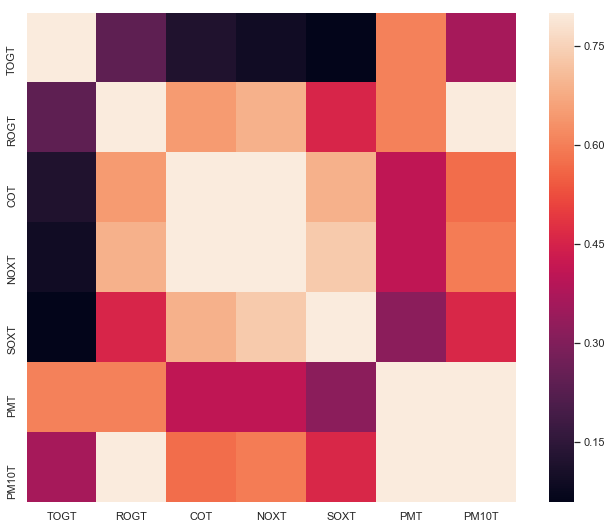

In [14]:
# Make the correlation matrix.

df_corrmat = df_orig.loc[
    (df_orig['AB'] == 'SF') | (df_orig['AB'] == 'SD'),
    ['AB','TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT', 'PM10T']
]

corrmat = df_corrmat.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


### 5. Boxplots: visualization of .describe (variance)

#### Variance in tons of pollutants emitted between Air Basins that boxplot is not working to visualize this data (no actual boxes, medians, whiskers displayed).  Will create two sets of boxplots and set y limits to zoom in on areas of interest.

#### Set y limit of range [0, 14] to capture upper edges.


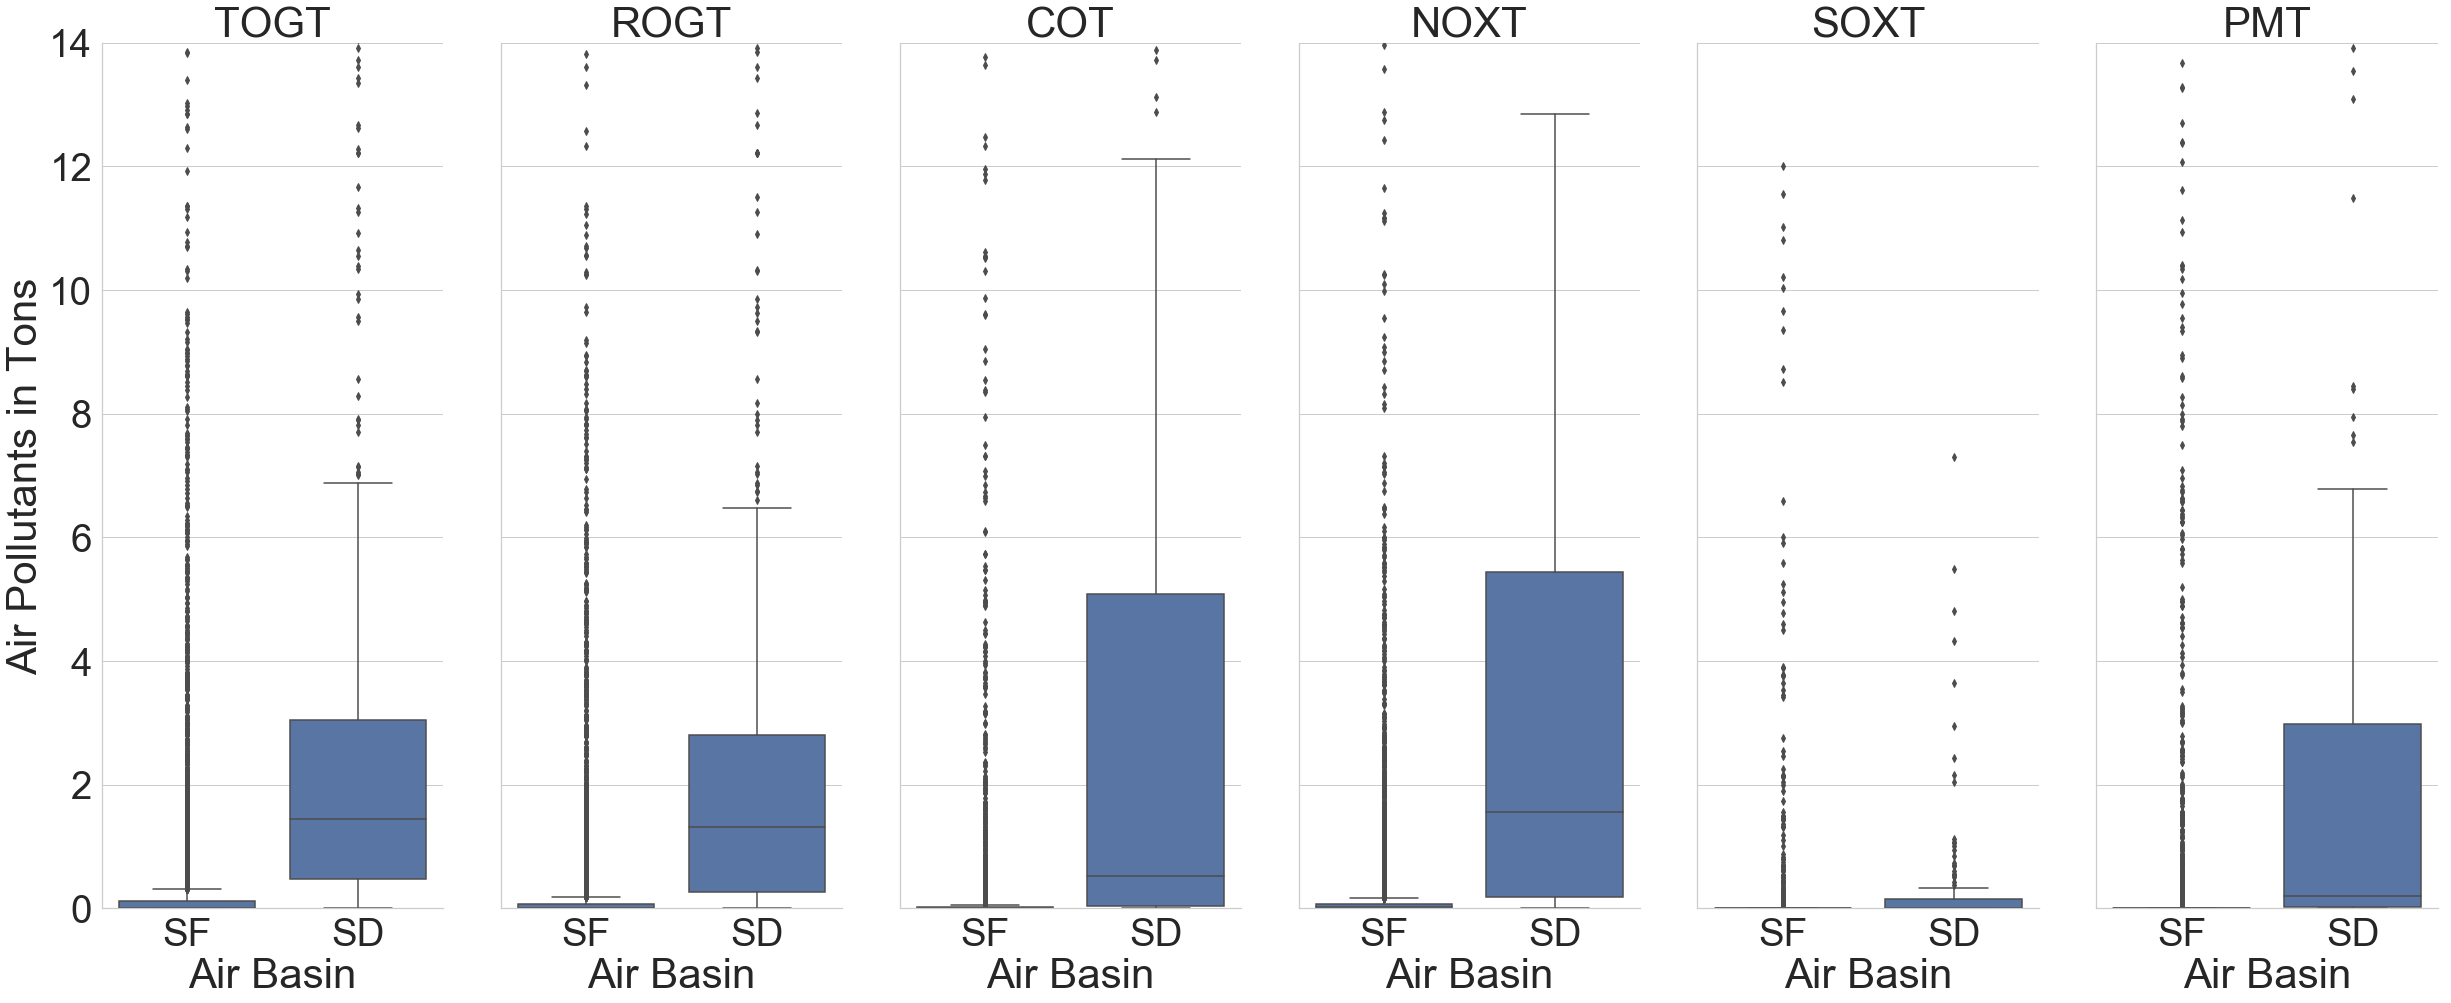

In [15]:
# Plot all the variables with boxplots for each Air Basin.

# Take a subset of the data to make plots clearer: San Francisco and San Diego Air Basins.
df_boxplot_1 = df_orig.loc[
    (df_orig['AB'] == 'SF') | (df_orig['AB'] == 'SD'),
    ['AB','TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']
]

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_boxplot_1
df_long = pd.melt(df_long, id_vars=['AB'])

# Increase size of font in title and axes in this facet grid only (global set in sns.style()):
# Combine the seaborn style and context parameters into one dictionary
# Pass dictionary to the plt.rc_context function

with plt.rc_context(dict(sns.axes_style("whitegrid"),
                         **sns.plotting_context("notebook", font_scale=3.5))):
    g = sns.FacetGrid(df_long, col="variable", height=15, aspect=.4)
    g = (g.map(sns.boxplot, "AB", "value", order=None)
         .set_titles("{col_name}") 
         .set_axis_labels("Air Basin", "Air Pollutants in Tons")
        )

# To change x label and font-size of first grid in facet grid
#g = g.axes[0,0].set_xlabel('Whoopee!', fontsize=50)

# To change title for each facet in the grid to add static text
# g = (g.map(sns.boxplot, "AB", "value", order=None) .set_titles("Variable: {col_name}"))

# Set y limit to see the bigger picture
plt.ylim([0,14])

plt.show()


#### Set y limit of range [0, .5] to capture lower edges.

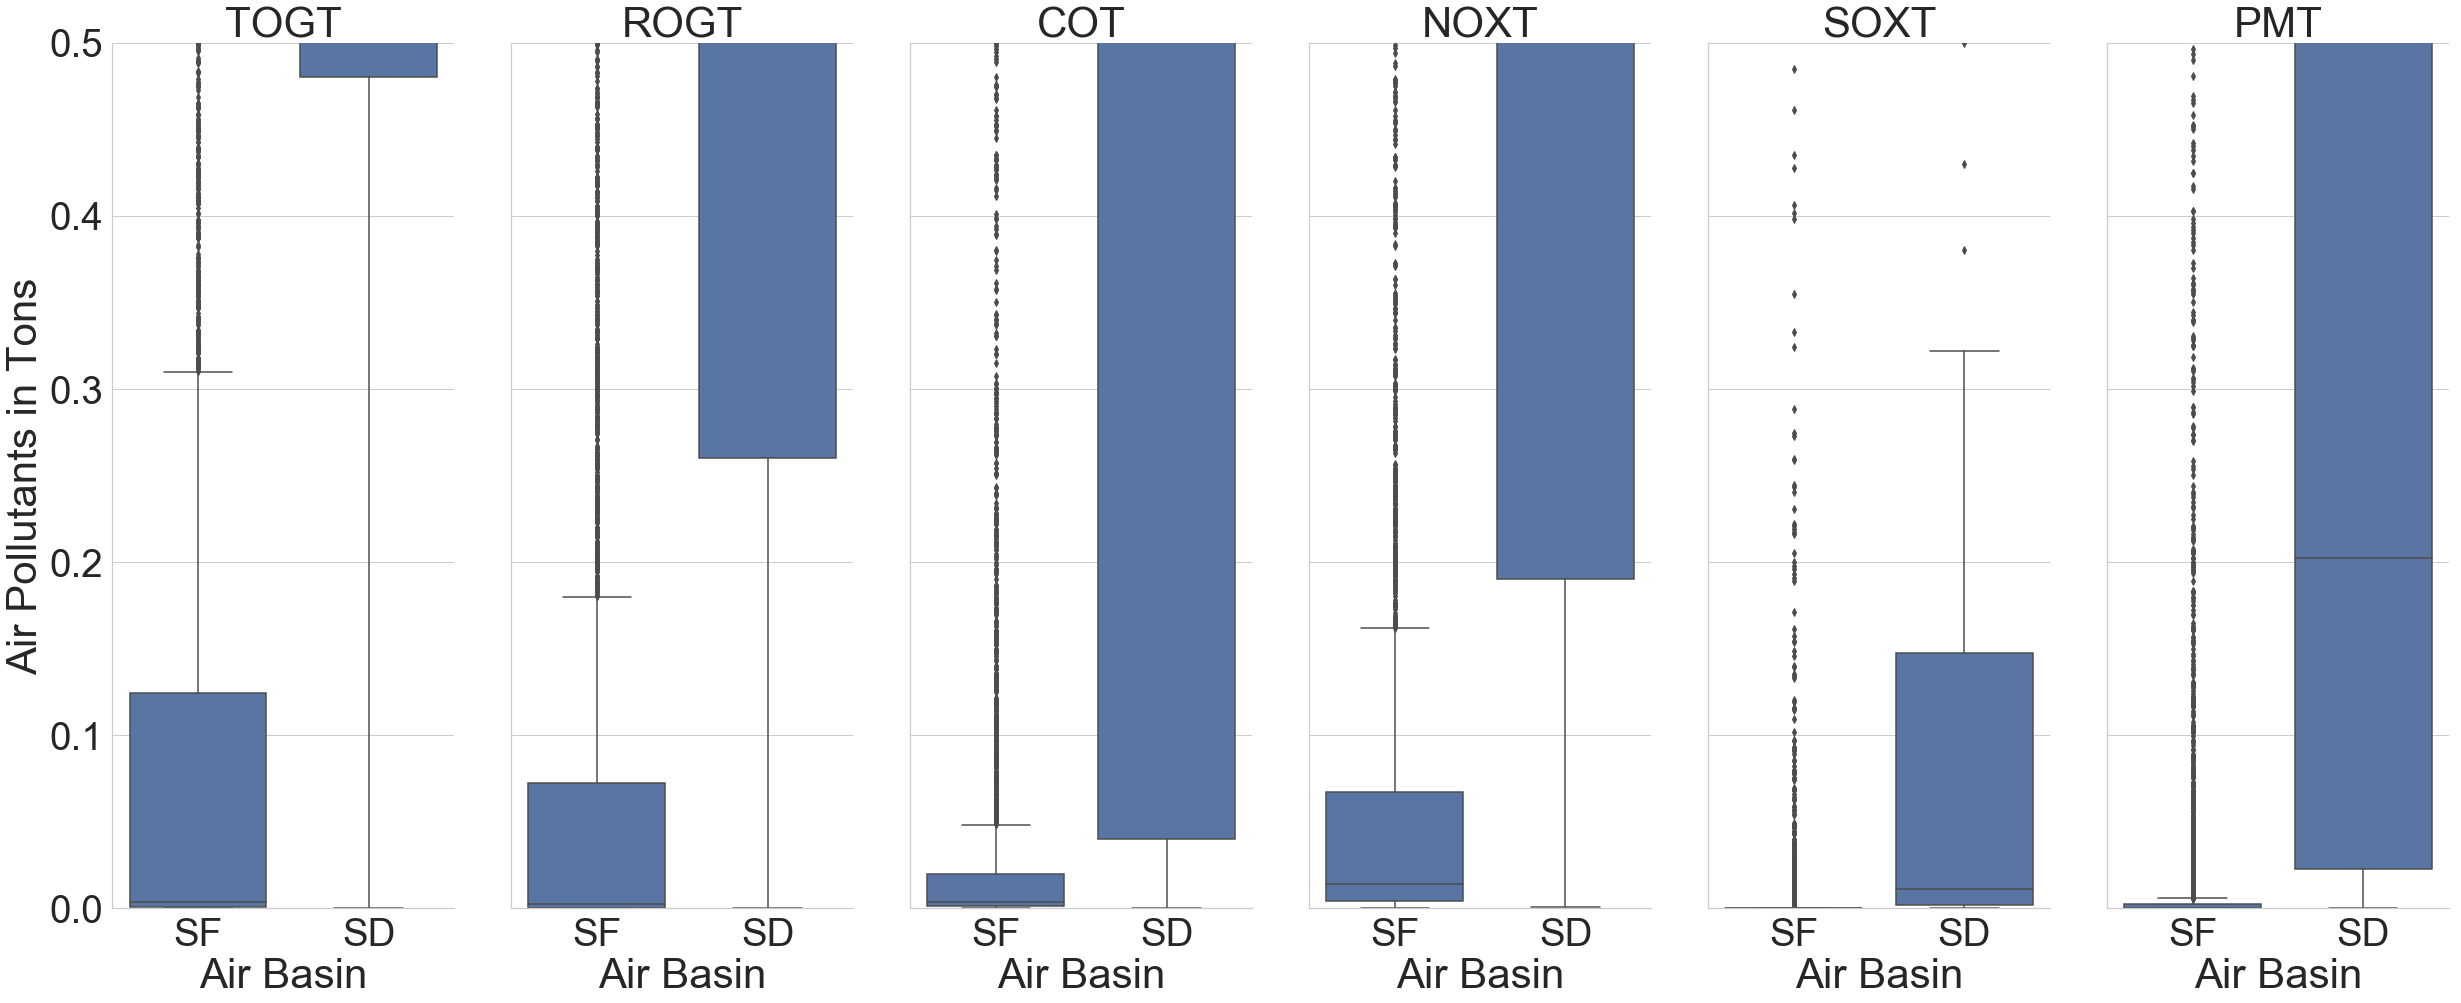

In [16]:
# Plot all the variables with boxplots for each Air Basin.

# Take a subset of the data to make plots clearer: San Francisco and San Diego Air Basins.
df_boxplot_2 = df_orig.loc[
    (df_orig['AB'] == 'SF') | (df_orig['AB'] == 'SD'),
    ['AB','TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']
]


# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_boxplot_2
df_long = pd.melt(df_long, id_vars=['AB'])

# Increase size of font in title and axes in this facet grid only (global set in sns.style()):
#Combine the seaborn style and context parameters into one dictionary
# Pass dictionary to the plt.rc_context function

with plt.rc_context(dict(sns.axes_style("whitegrid"),
                         **sns.plotting_context("notebook", font_scale=3.5))):
    g = sns.FacetGrid(df_long, col="variable", height=15, aspect=.4)
    g = (g.map(sns.boxplot, "AB", "value", order=None)
         .set_titles("{col_name}") 
         .set_axis_labels("Air Basin", "Air Pollutants in Tons")
        )

# To change x label and font-size of first grid in facet grid
#g = g.axes[0,0].set_xlabel('Whoopee!', fontsize=50)

# To change title for each facet in the grid to add static text
# g = (g.map(sns.boxplot, "AB", "value", order=None) .set_titles("Variable: {col_name}"))

# Set y limit to see more zoomed in picture
plt.ylim([0,.5])

plt.show()


### 6. T-Tests: Check signficance of differences between groups (SF and SD) for each pollutant

In [30]:
# Test whether group differences are significant.
for col in df_boxplot.loc[:,'TOGT':'PMT'].columns:
    print()
    print(col)
    print(stats.ttest_ind(
        df_boxplot[df_boxplot['AB'] == 'SF'][col].dropna(),
        df_boxplot[df_boxplot['AB'] == 'SD'][col].dropna()
    ))


TOGT
Ttest_indResult(statistic=-7.744059940005005, pvalue=1.1476483813672462e-14)

ROGT
Ttest_indResult(statistic=-1.9702623268691133, pvalue=0.04886075468234016)

COT
Ttest_indResult(statistic=-3.6484864552840164, pvalue=0.00026634904577041684)

NOXT
Ttest_indResult(statistic=-1.9421912055288342, pvalue=0.05216734008055806)

SOXT
Ttest_indResult(statistic=0.2965450494401822, pvalue=0.7668255922952284)

PMT
Ttest_indResult(statistic=-8.587755804716842, pvalue=1.1540729921043918e-17)


In [22]:
# Keep columns of interest for analysis.  Denote copy to avoid "Setting With Copy" warning
# https://www.dataquest.io/blog/settingwithcopywarning/
df = df_orig[['CO', 'AB', 'DIS', 'FNAME', 'FZIP', 'COID', 'DISN', 'TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']].copy()

## Method 1: Normalizing Data and Testing Normalization

### Are the distributions normal?
### 1. Do a scatter pair plot
### 2. Do a kde plot to get shape of histograms
 
### Are there relationships between the continuous variables?
### 3. Do a regplot to get a linear relationship between the variables
Note: If you want relationships between binary variables (true/false) - do pd.getdummies first.

#### Pollutants: No apparent linear relationship between variables.

#### The histograms (diagonal from left to right) do not appear normal - will need to normalize the data


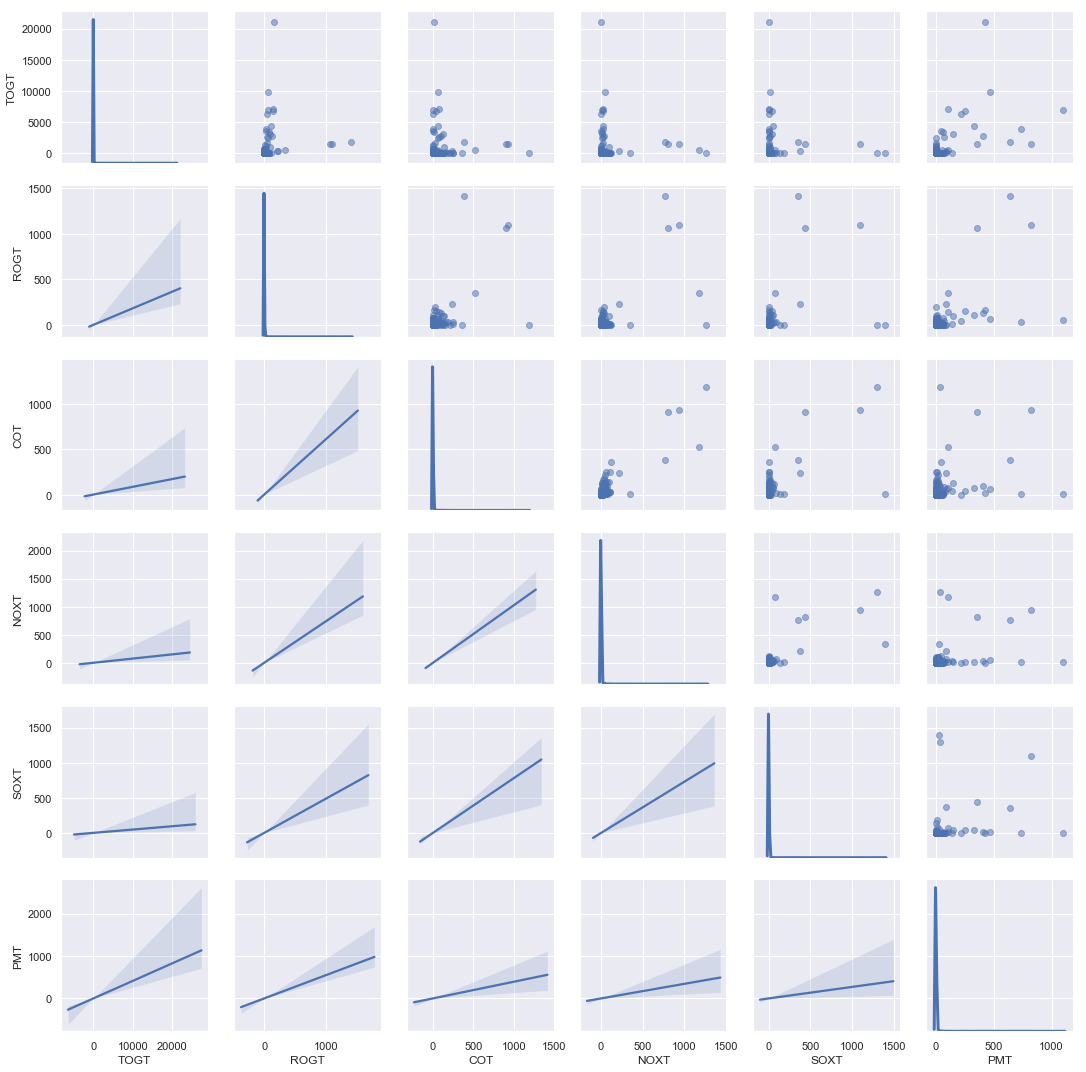

In [23]:
# Take a subset of the data to make plots clearer: San Francisco and San Diego Air Basins.
df_scatterplot_matrix = df.loc[
    (df['AB'] == 'SF') | (df['AB'] == 'SD'),
    ['AB','TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']
]

# Make a scatterplot Matrix.
g = sns.PairGrid(df_scatterplot_matrix.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

### Normalize the data
### 4. Try Log, Square Root, and Inverse of Square Root and plot as histograms to determine which method appears to "normalize" data best

#### Replace the 0 values with NAN since it screws everything up - turns them into "NaN" - missing values you remove in normalization
- ex: np.log(df[['TOGT']].replace(0, np.nan)).head()

#### Create figure plots with histograms of raw data and log, square root, and inverse of square root normalized data


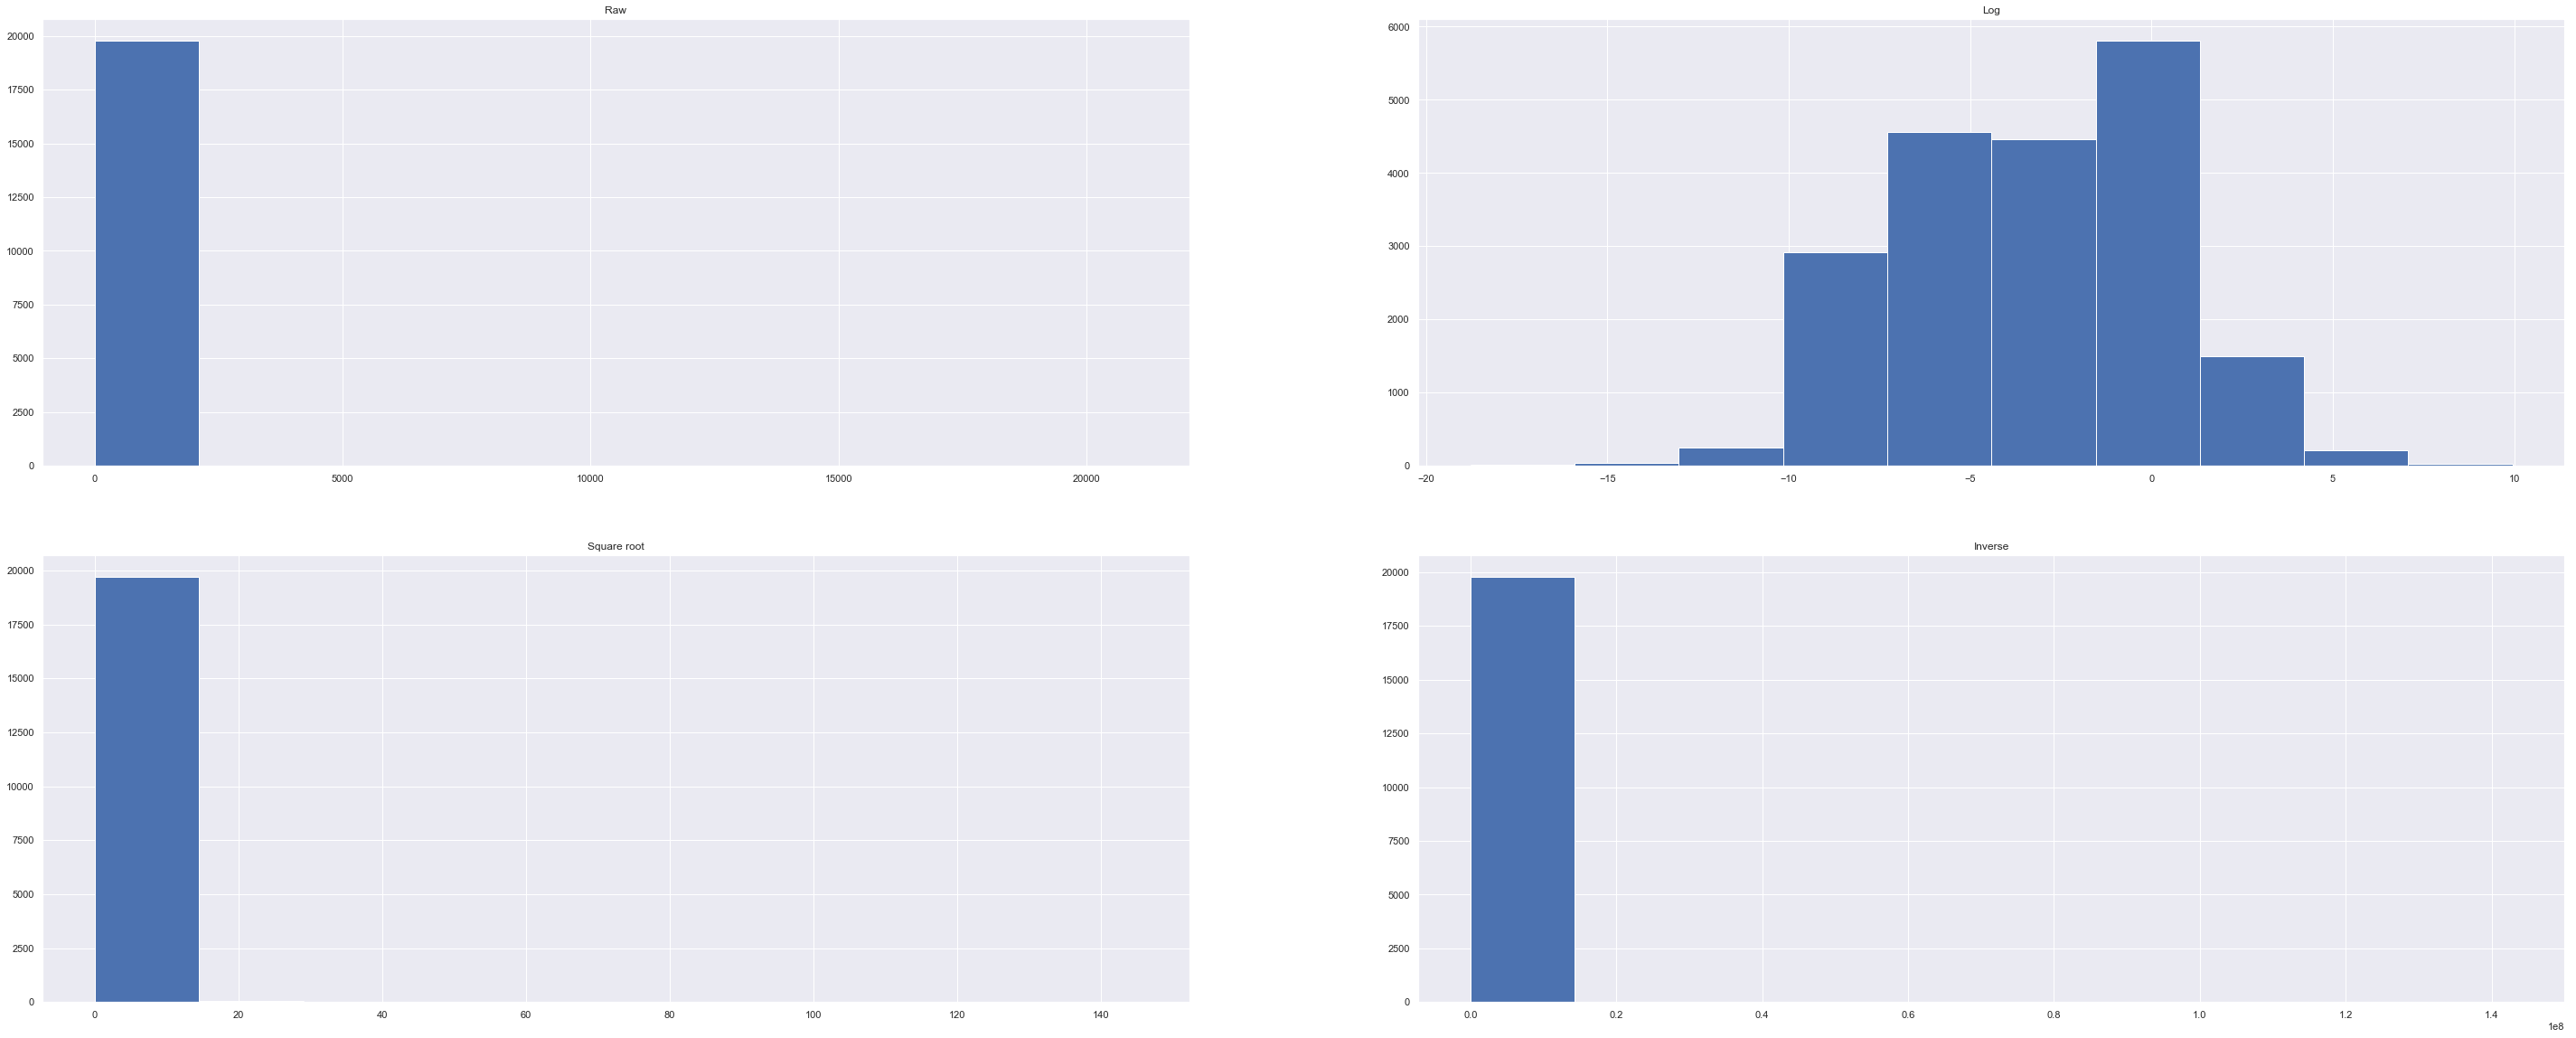

In [30]:
# TOGT
# Making a four-panel plot.
# Replace all 0's with NaN values: .replace(0, np.nan)
# Remove all the NaN values with dropna to remove 0's and missing values for this step: .dropna()
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['TOGT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['TOGT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['TOGT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['TOGT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()


### 5. Create a feature from the best apparent approach to normalize data

### Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [32]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_TOGT'] = np.log(df['TOGT'].replace(0, np.nan).dropna())

### Repeat steps 4 and 5 for all other features

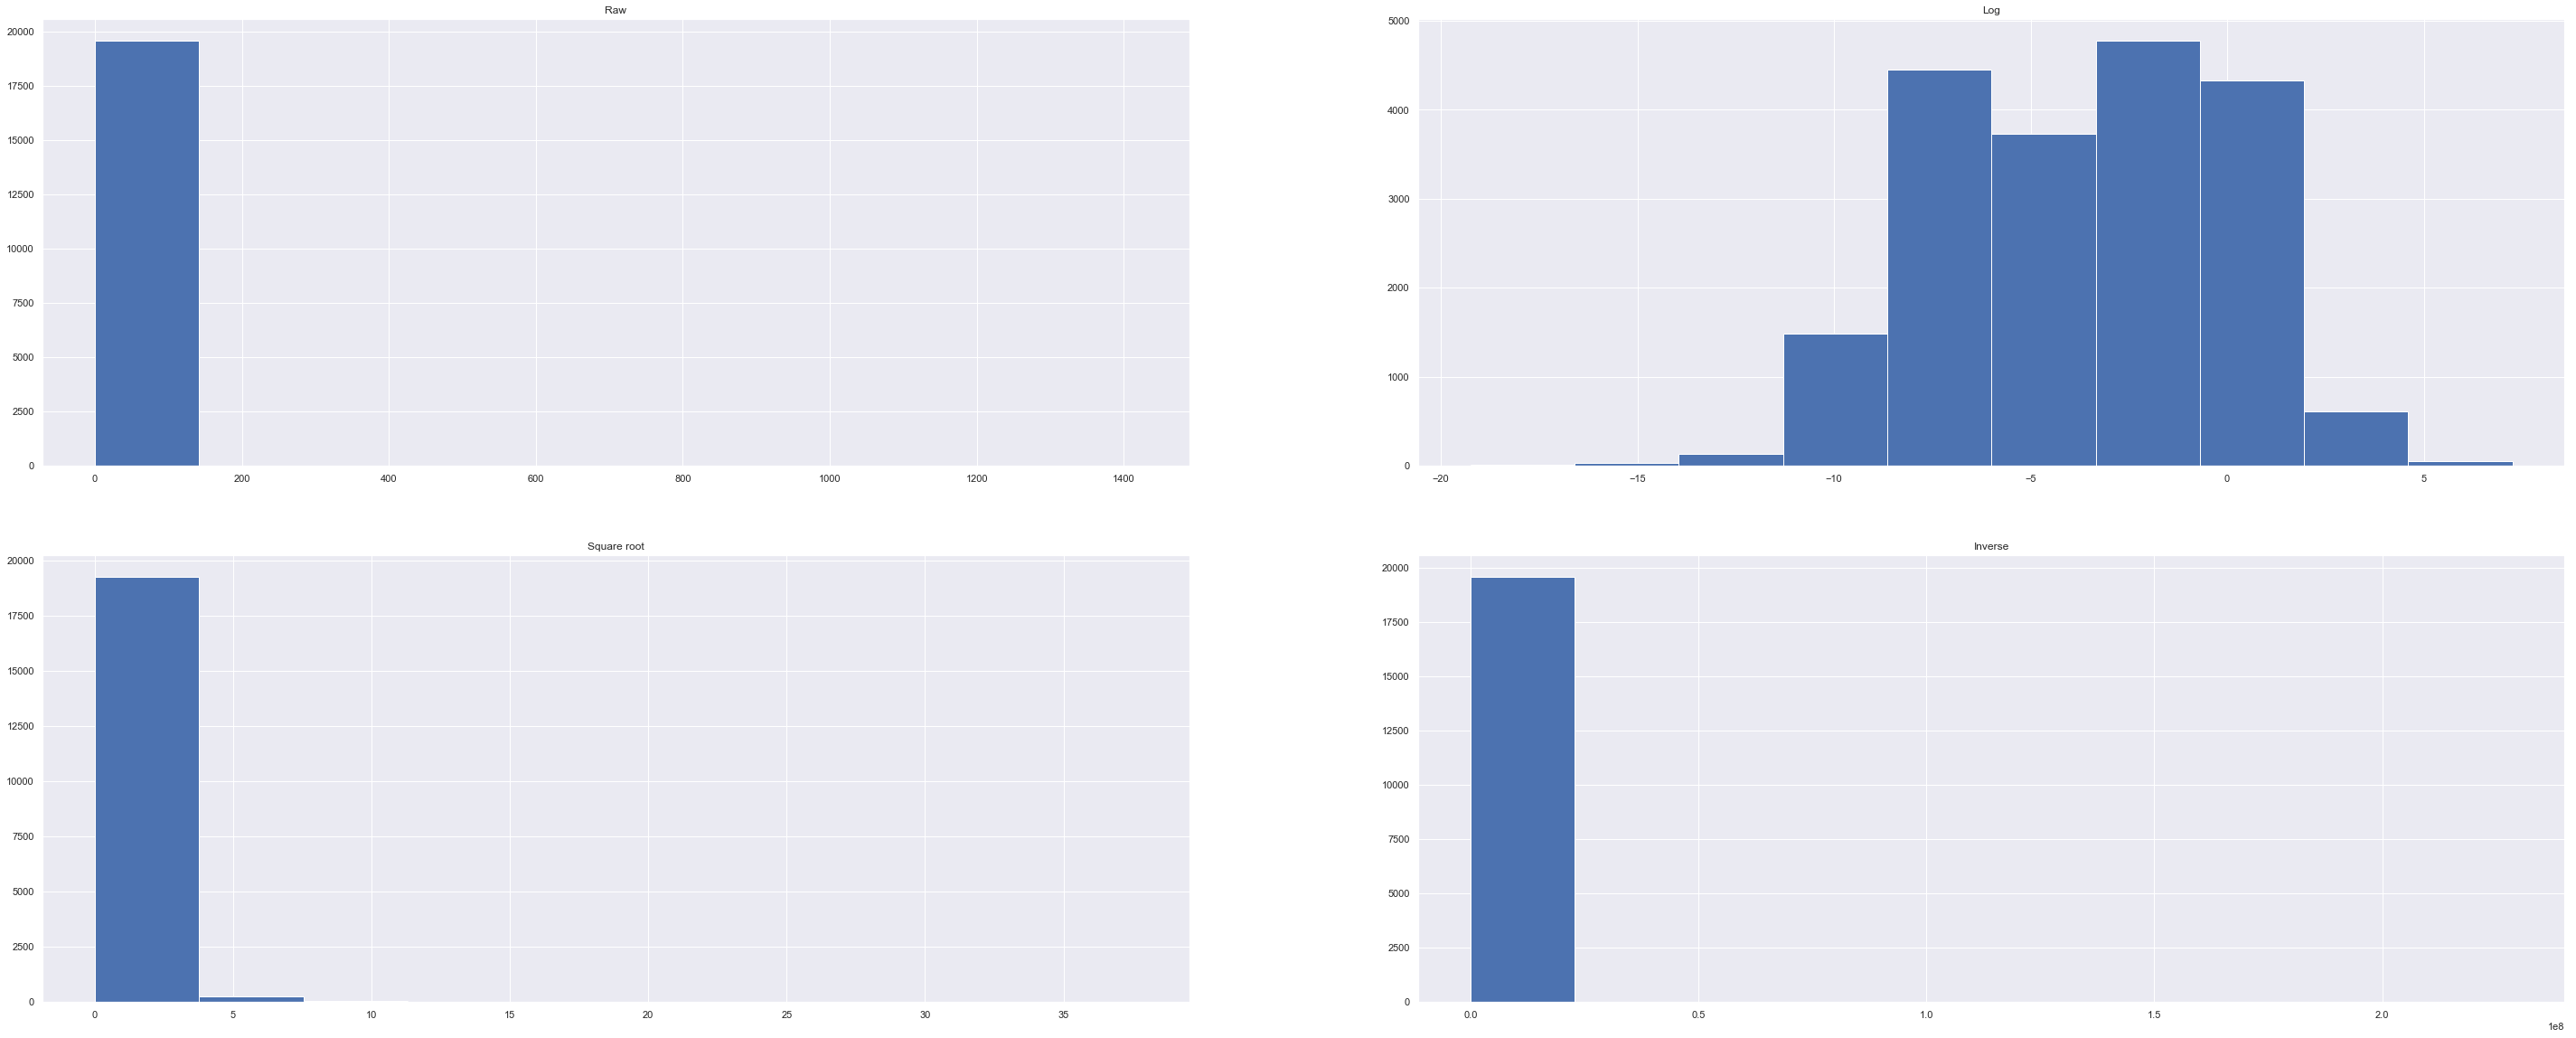

In [33]:
# ROGT
# Making a four-panel plot.  Replace all the 0's with NaN values,
# and then remove all the NaN values with dropna while I'm at it so that missing values are gone
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['ROGT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['ROGT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['ROGT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['ROGT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

### ROGT: Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [34]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_ROGT'] = np.log(df['ROGT'].replace(0, np.nan).dropna())

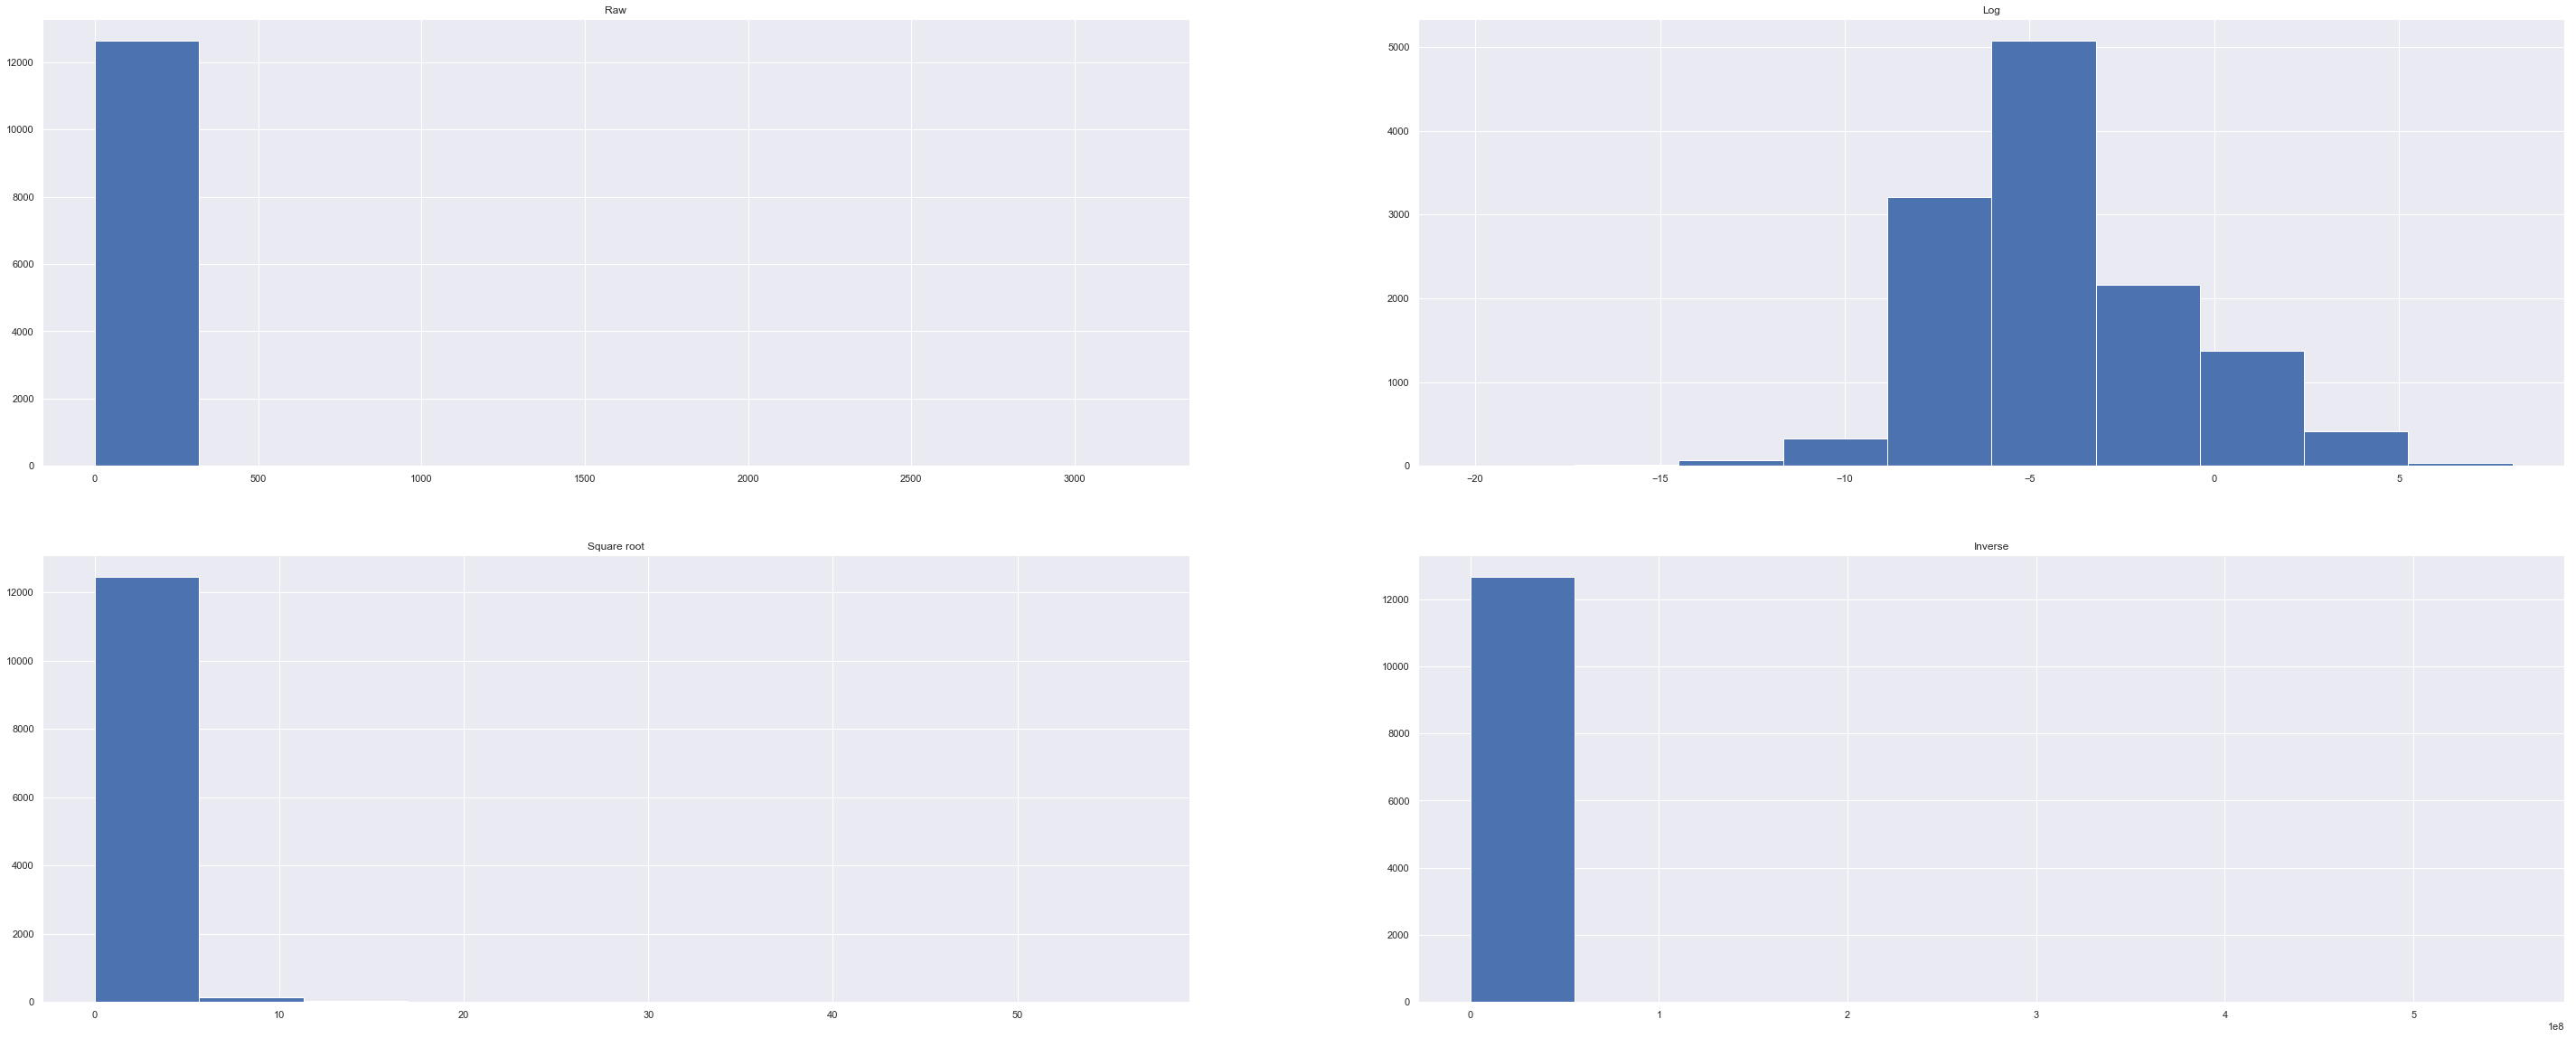

In [35]:
# COT
# Making a four-panel plot.  Replace all the 0's with NaN values,
# and then remove all the NaN values with dropna while I'm at it so that missing values are gone
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['COT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['COT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['COT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['COT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

### COT: Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [36]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_ROGT'] = np.log(df['ROGT'].replace(0, np.nan).dropna())

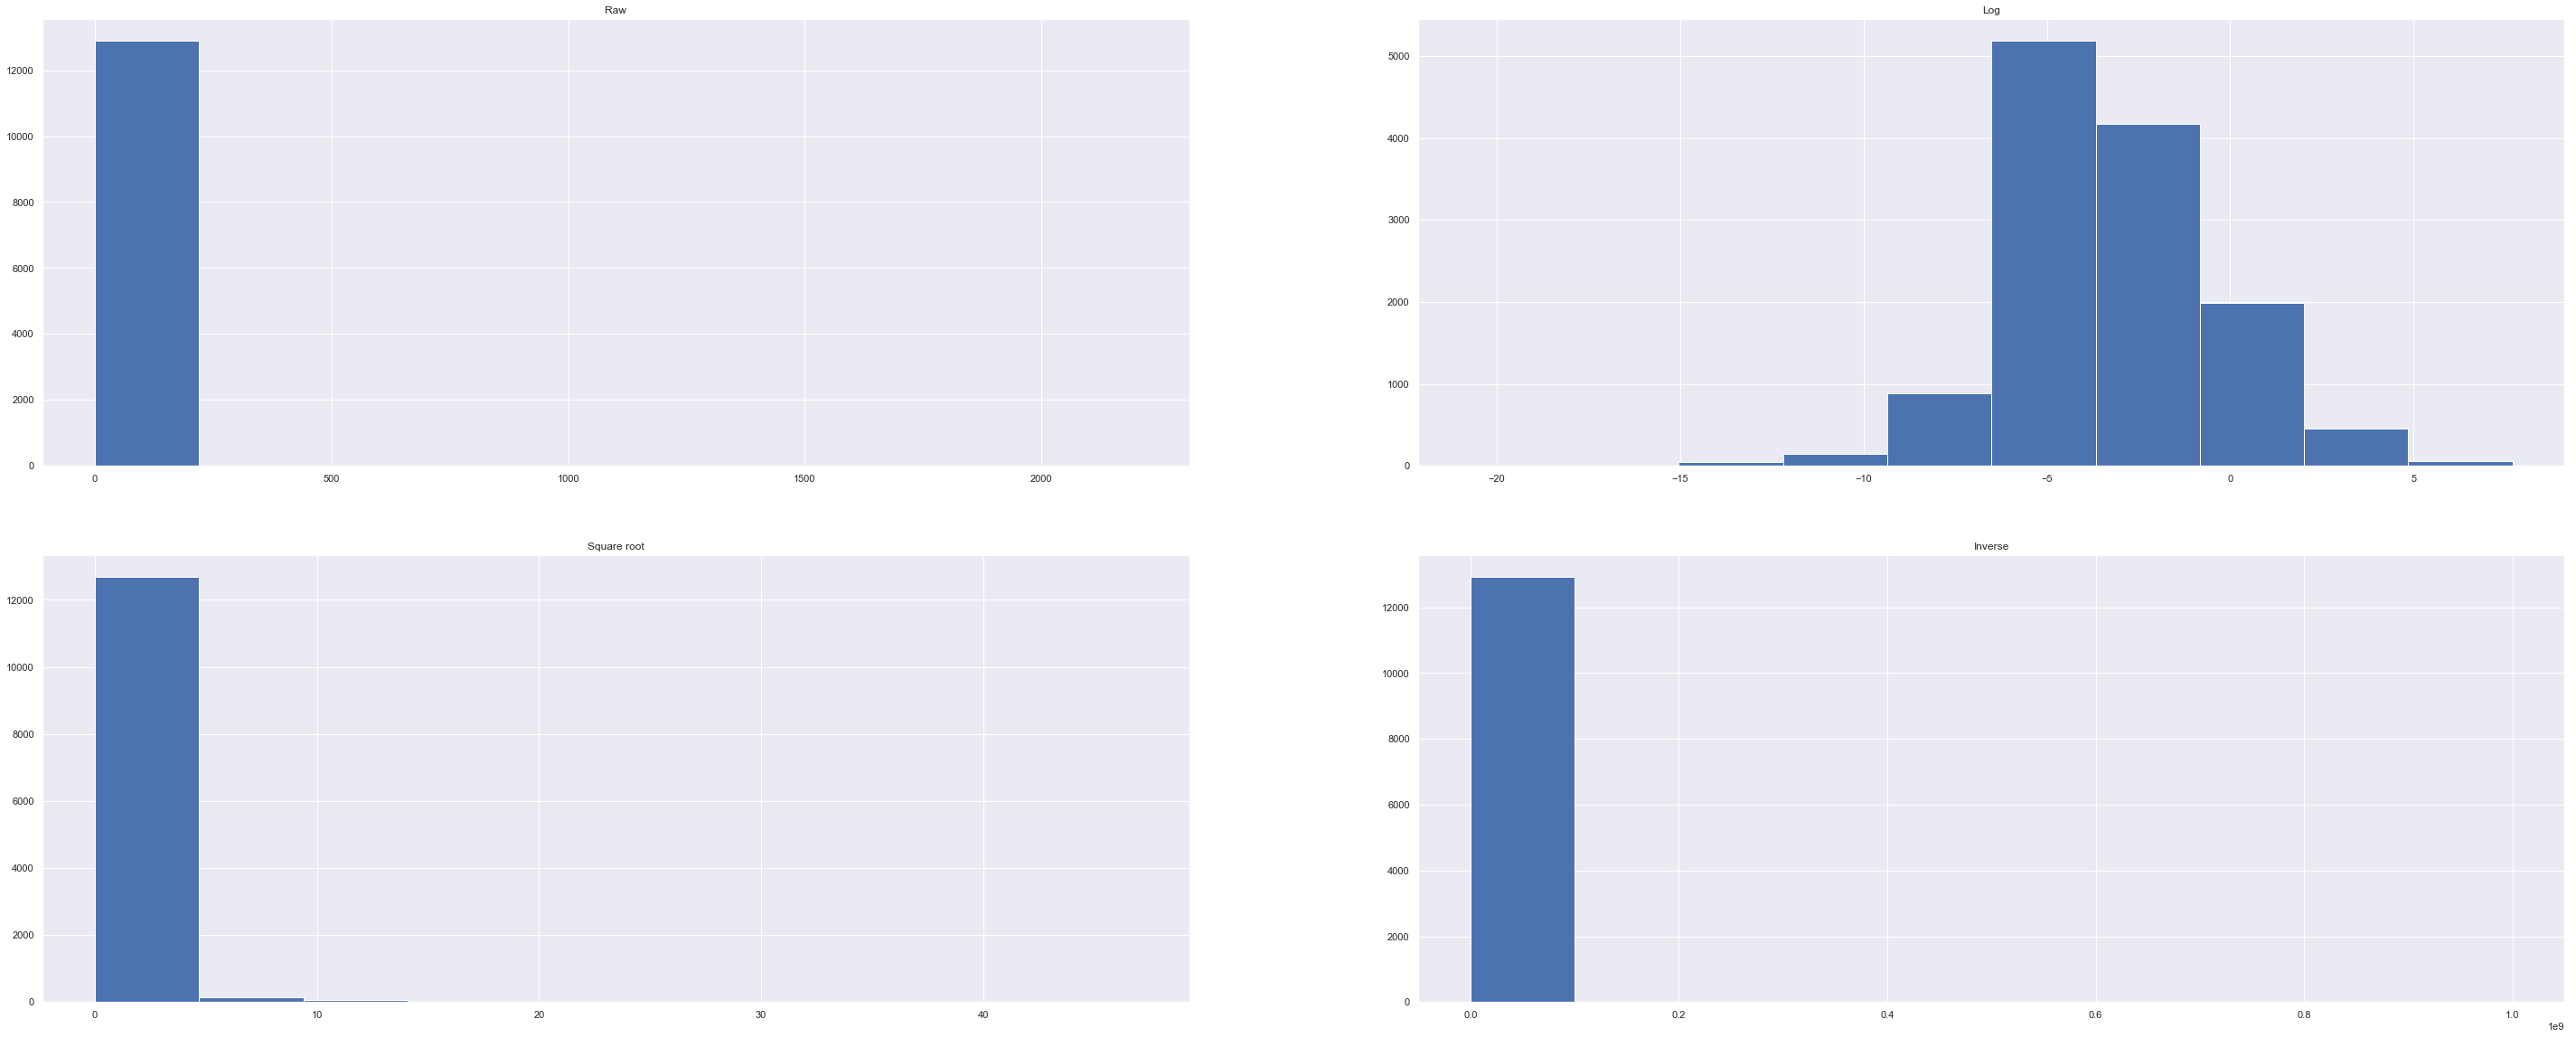

In [37]:
# NOXT
# Making a four-panel plot.  Replace all the 0's with NaN values,
# and then remove all the NaN values with dropna while I'm at it so that missing values are gone
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['NOXT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['NOXT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['NOXT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['NOXT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

### NOXT: Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [38]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_NOXT'] = np.log(df['NOXT'].replace(0, np.nan).dropna())

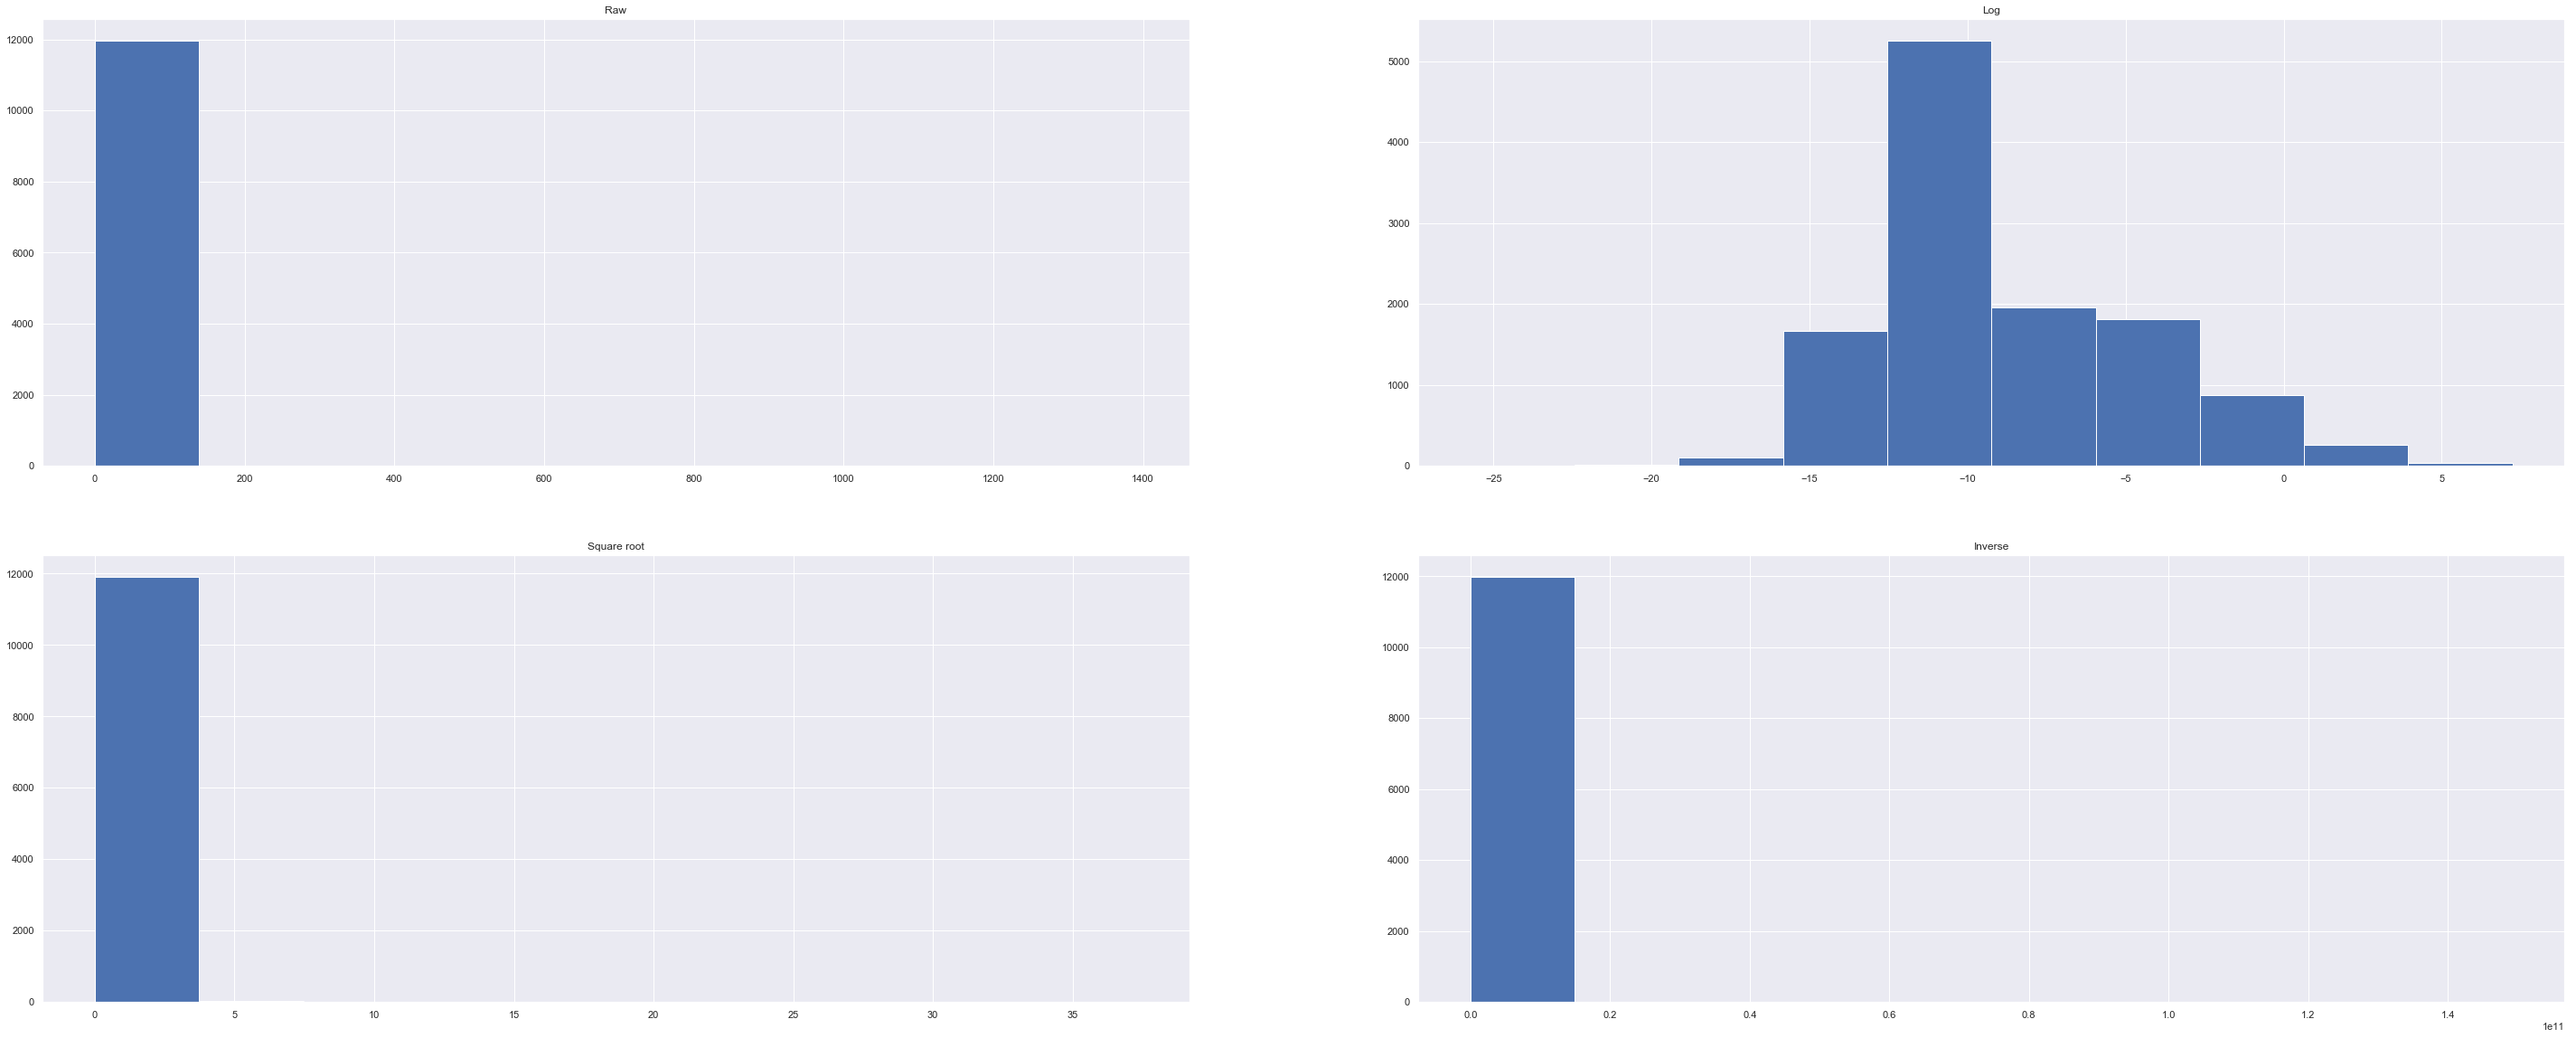

In [39]:
# SOXT
# Making a four-panel plot.  Replace all the 0's with NaN values,
# and then remove all the NaN values with dropna while I'm at it so that missing values are gone
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['SOXT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['SOXT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['SOXT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['SOXT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

### SOXT: Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [40]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_SOXT'] = np.log(df['SOXT'].replace(0, np.nan).dropna())

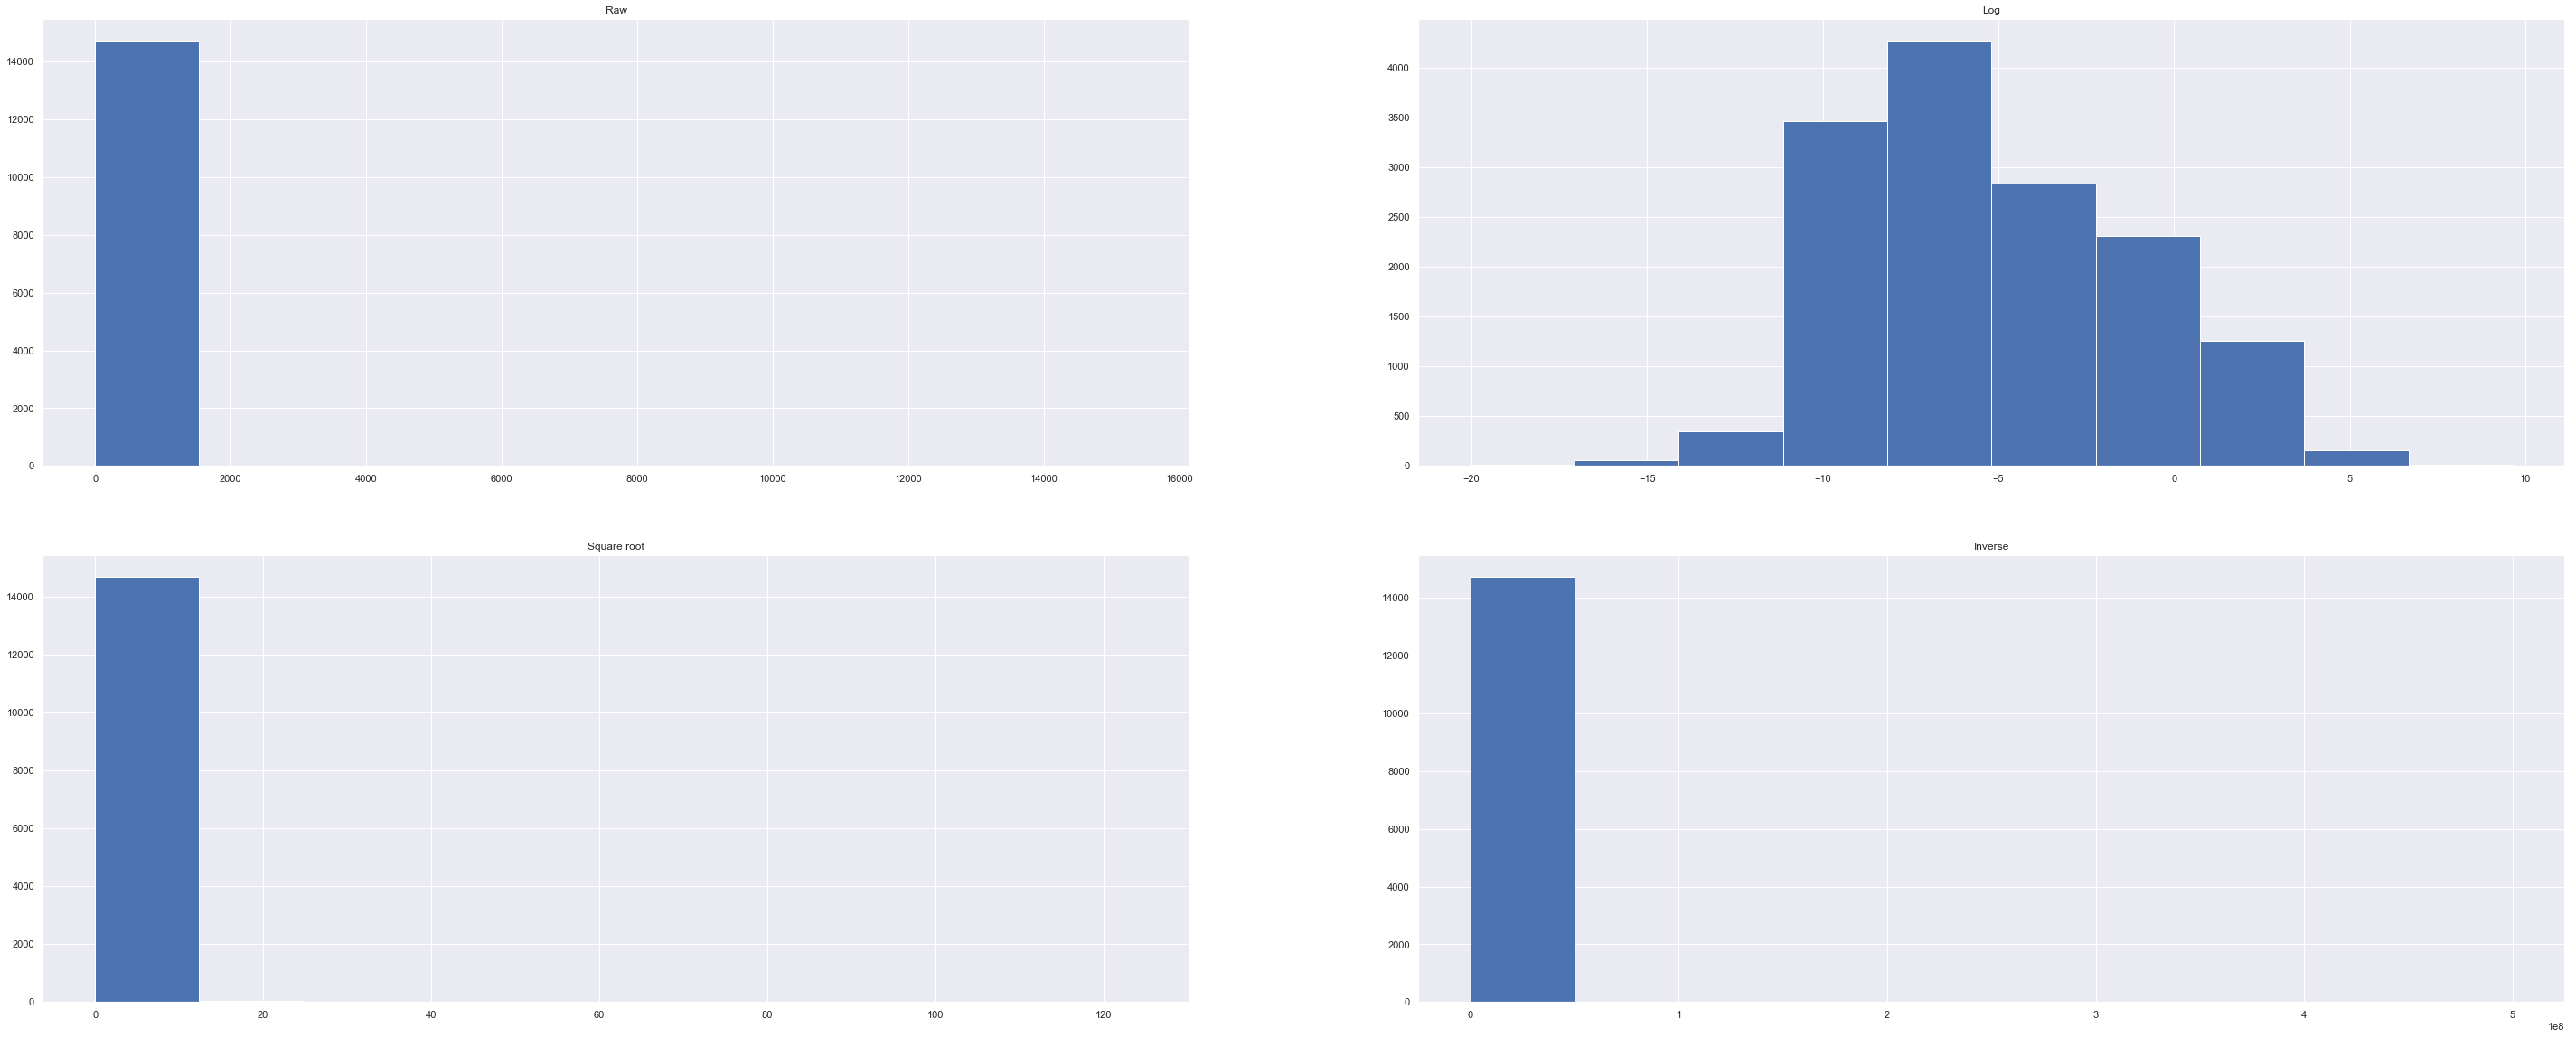

In [41]:
# PMT
# Making a four-panel plot.  Replace all the 0's with NaN values,
# and then remove all the NaN values with dropna while I'm at it so that missing values are gone
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['PMT'].replace(0, np.nan).dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['PMT'].replace(0, np.nan).dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['PMT'].replace(0, np.nan).dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['PMT'].replace(0, np.nan).dropna())
plt.title('Inverse')
plt.show()

### PMT: Log approach appears to make distribution look most normal, so lt's create a feature from the log normalization approach.

In [44]:
# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.  Feature = new column that has the log

df['log_PMT'] = np.log(df['PMT'].replace(0, np.nan).dropna())

## Statistical Testing for Normal Distribution

### 6. Do Statistical Test to check what's "most" normal distribution of approaches:
https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9

#### Test normalization approach (log vs square root vs inverse of square root) to determine which one gets closest to shifting the distribution so it's normal.

#### Shapiro Test:
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.  Doesn't work well with more than 5,000 observations.

#### Kolmogorov-Smirnov:
The Kolmogorov–Smirnov tests if a sample distribution fits a cumulative distribution function (CDF) of our referenced distribution. Or, if the CDF between of two different samples fit each other.

### Shapiro Test: 

In [46]:
# Set TOGT: log, square_root, inverse
# Get the log of TOGT (replace 0's with NaN, and then drop missing values)
togt_log = np.log(df['TOGT'].replace(0, np.nan).dropna())

# Get the square root of TOGT  (replace 0's with NaN, and then drop missing values)
togt_square_root = np.sqrt(df['TOGT'].replace(0, np.nan).dropna())

# Get the inverse of TOGT  (replace 0's with NaN, and then drop missing values)
togt_inverse = np.sqrt(1/df['TOGT'].replace(0, np.nan).dropna())
#
#

# Set ROGT: log, square_root, inverse
# Get the log of ROGT (replace 0's with NaN, and then drop missing values)
rogt_log = np.log(df['ROGT'].replace(0, np.nan).dropna())

# Get the square root of ROGT  (replace 0's with NaN, and then drop missing values)
rogt_square_root = np.sqrt(df['ROGT'].replace(0, np.nan).dropna())

# Get the inverse of ROGT  (replace 0's with NaN, and then drop missing values)
rogt_inverse = np.sqrt(1/df['ROGT'].replace(0, np.nan).dropna())
#
#

# Set COT: log, square_root, inverse
# Get the log of COT (replace 0's with NaN, and then drop missing values)
cot_log = np.log(df['COT'].replace(0, np.nan).dropna())

# Get the square root of COT  (replace 0's with NaN, and then drop missing values)
cot_square_root = np.sqrt(df['COT'].replace(0, np.nan).dropna())

# Get the inverse of COT  (replace 0's with NaN, and then drop missing values)
cot_inverse = np.sqrt(1/df['COT'].replace(0, np.nan).dropna())
#
#

# Set NOXT: log, square_root, inverse
# Get the log of NOXT (replace 0's with NaN, and then drop missing values)
noxt_log = np.log(df['NOXT'].replace(0, np.nan).dropna())

# Get the square root of NOXT  (replace 0's with NaN, and then drop missing values)
noxt_square_root = np.sqrt(df['NOXT'].replace(0, np.nan).dropna())

# Get the inverse of NOXT  (replace 0's with NaN, and then drop missing values)
noxt_inverse = np.sqrt(1/df['NOXT'].replace(0, np.nan).dropna())
#
#

# Set SOXT: log, square_root, inverse
# Get the log of SOXT (replace 0's with NaN, and then drop missing values)
soxt_log = np.log(df['SOXT'].replace(0, np.nan).dropna())

# Get the square root of SOXT  (replace 0's with NaN, and then drop missing values)
soxt_square_root = np.sqrt(df['SOXT'].replace(0, np.nan).dropna())

# Get the inverse of SOXT  (replace 0's with NaN, and then drop missing values)
soxt_inverse = np.sqrt(1/df['SOXT'].replace(0, np.nan).dropna())
#
#

# Set PMT: log, square_root, inverse
# Get the log of PMT (replace 0's with NaN, and then drop missing values)
pmt_log = np.log(df['PMT'].replace(0, np.nan).dropna())

# Get the square root of PMT  (replace 0's with NaN, and then drop missing values)
pmt_square_root = np.sqrt(df['PMT'].replace(0, np.nan).dropna())

# Get the inverse of PMT  (replace 0's with NaN, and then drop missing values)
pmt_inverse = np.sqrt(1/df['PMT'].replace(0, np.nan).dropna())
#
#


#### Shapiro Test: Since over 22k observation, will result in user warning of over 5k observation.  

In [48]:
# Get W, P-value
# W: test statistic - closest to 100 is most normal
# P-value: < .05 = NOT normal distribution

print('Shapiro Test - TOGT:')
print('Log: ', stats.shapiro(togt_log))
print('Square root: ', stats.shapiro(togt_square_root))
print('Inverse: ', stats.shapiro(togt_inverse))
print()

print('Shapiro Test - Random 5000 SAMPLE TOGT:')
print('Log: ', stats.shapiro(togt_log.sample(5000)))
print('Square root: ', stats.shapiro(togt_square_root.sample(5000)))
print('Inverse: ', stats.shapiro(togt_inverse.sample(5000)))
print()

print('Shapiro Test - ROGT:')
print('Log: ', stats.shapiro(rogt_log))
print('Square root: ', stats.shapiro(rogt_square_root))
print('Inverse: ', stats.shapiro(rogt_inverse))
print()

print('Shapiro Test - COT:')
print('Log: ', stats.shapiro(cot_log))
print('Square root: ', stats.shapiro(cot_square_root))
print('Inverse: ', stats.shapiro(cot_inverse))
print()

print('Shapiro Test - NOXT:')
print('Log: ', stats.shapiro(noxt_log))
print('Square root: ', stats.shapiro(noxt_square_root))
print('Inverse: ', stats.shapiro(noxt_inverse))
print()

print('Shapiro Test - SOXT:')
print('Log: ', stats.shapiro(soxt_log))
print('Square root: ', stats.shapiro(soxt_square_root))
print('Inverse: ', stats.shapiro(soxt_inverse))
print()

print('Shapiro Test - PMT:')
print('Log: ', stats.shapiro(pmt_log))
print('Square root: ', stats.shapiro(pmt_square_root))
print('Inverse: ', stats.shapiro(pmt_inverse))
print()


Shapiro Test - TOGT:
Log:  (0.9840297102928162, 9.165893255148628e-42)
Square root:  (0.19615590572357178, 0.0)
Inverse:  (0.07812601327896118, 0.0)

Shapiro Test - Random 5000 SAMPLE TOGT:
Log:  (0.9809558391571045, 2.1520655510349897e-25)
Square root:  (0.2715222239494324, 0.0)
Inverse:  (0.14647573232650757, 0.0)

Shapiro Test - ROGT:
Log:  (0.9768698811531067, 0.0)
Square root:  (0.4252309203147888, 0.0)
Inverse:  (0.07492011785507202, 0.0)

Shapiro Test - COT:
Log:  (0.9679489135742188, 0.0)
Square root:  (0.2584902048110962, 0.0)
Inverse:  (0.03268110752105713, 0.0)

Shapiro Test - NOXT:
Log:  (0.980614423751831, 1.960200050977681e-38)
Square root:  (0.27463239431381226, 0.0)
Inverse:  (0.014460504055023193, 0.0)

Shapiro Test - SOXT:
Log:  (0.9359316229820251, 0.0)
Square root:  (0.1336815357208252, 0.0)
Inverse:  (0.02956289052963257, 0.0)

Shapiro Test - PMT:
Log:  (0.9725540280342102, 0.0)
Square root:  (0.22414249181747437, 0.0)
Inverse:  (0.10226619243621826, 0.0)



/Users/evarubin/.pyenv/versions/3.6.4/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Kolmogorov-Smirnov

#### Since there are more than 5000 entries, will attempt ks tests to determine closest fit to normality using log, square root, and inverse of square root approaches.  Not sure if this is right test, but here goes.
https://medium.com/@rrfd/testing-for-normality-applications-with-python-6bf06ed646a9
https://stackoverflow.com/questions/46678239/p-value-is-0-when-i-use-scipy-stats-kstest-for-large-dataset

#### KS Test on Log Normalized TOGT Data

In [49]:
togt_log_data = np.hstack(togt_log)
loc, scale = norm.fit(togt_log_data)

# create a normal distribution with loc and scale for togt data
n_togt_log = norm(loc=loc, scale=scale)
togt_log_cdf = n_togt_log.cdf

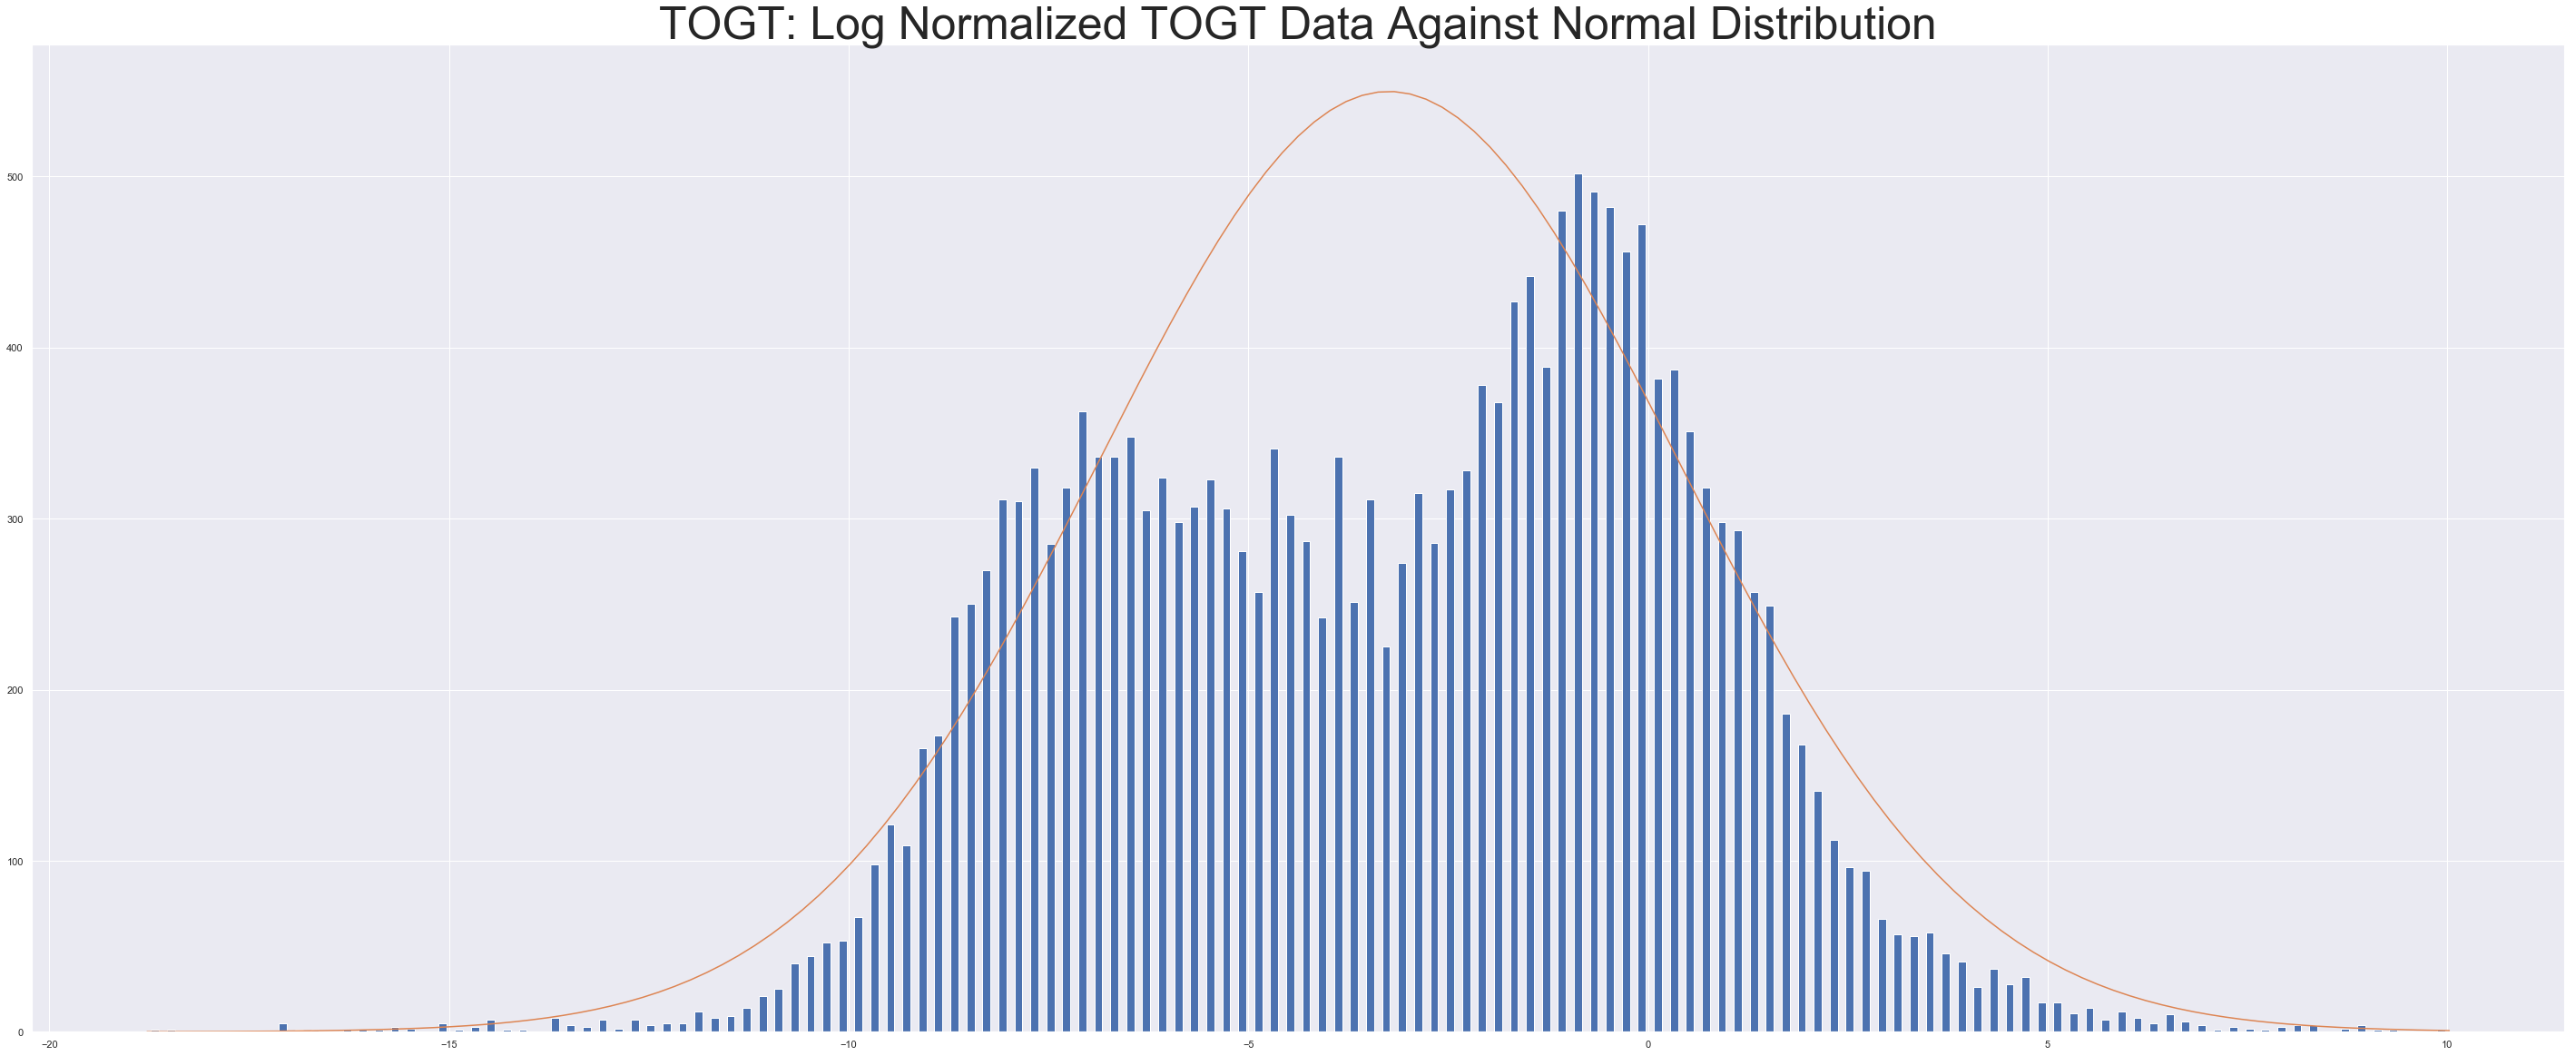

In [51]:
# Fit a normal distribution curve onto the data
plt.hist(togt_log_data, bins=np.arange(togt_log_data.min(), togt_log_data.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(togt_log_data.min(), togt_log_data.max()+0.2, 0.2)
plt.plot(x, 5000*n_togt_log.pdf(x))
plt.title('TOGT: Log Normalized TOGT Data Against Normal Distribution', fontsize='50')
plt.show()

In [52]:
togt_log_data_kstest = kstest(togt_log_data, togt_log_cdf)
togt_log_data_kstest

KstestResult(statistic=0.06470538932007674, pvalue=1.7896313674620378e-72)

#### Simpler way of generating an image (vs histogram above with a KS Test) of the data as compared to a normal distribution

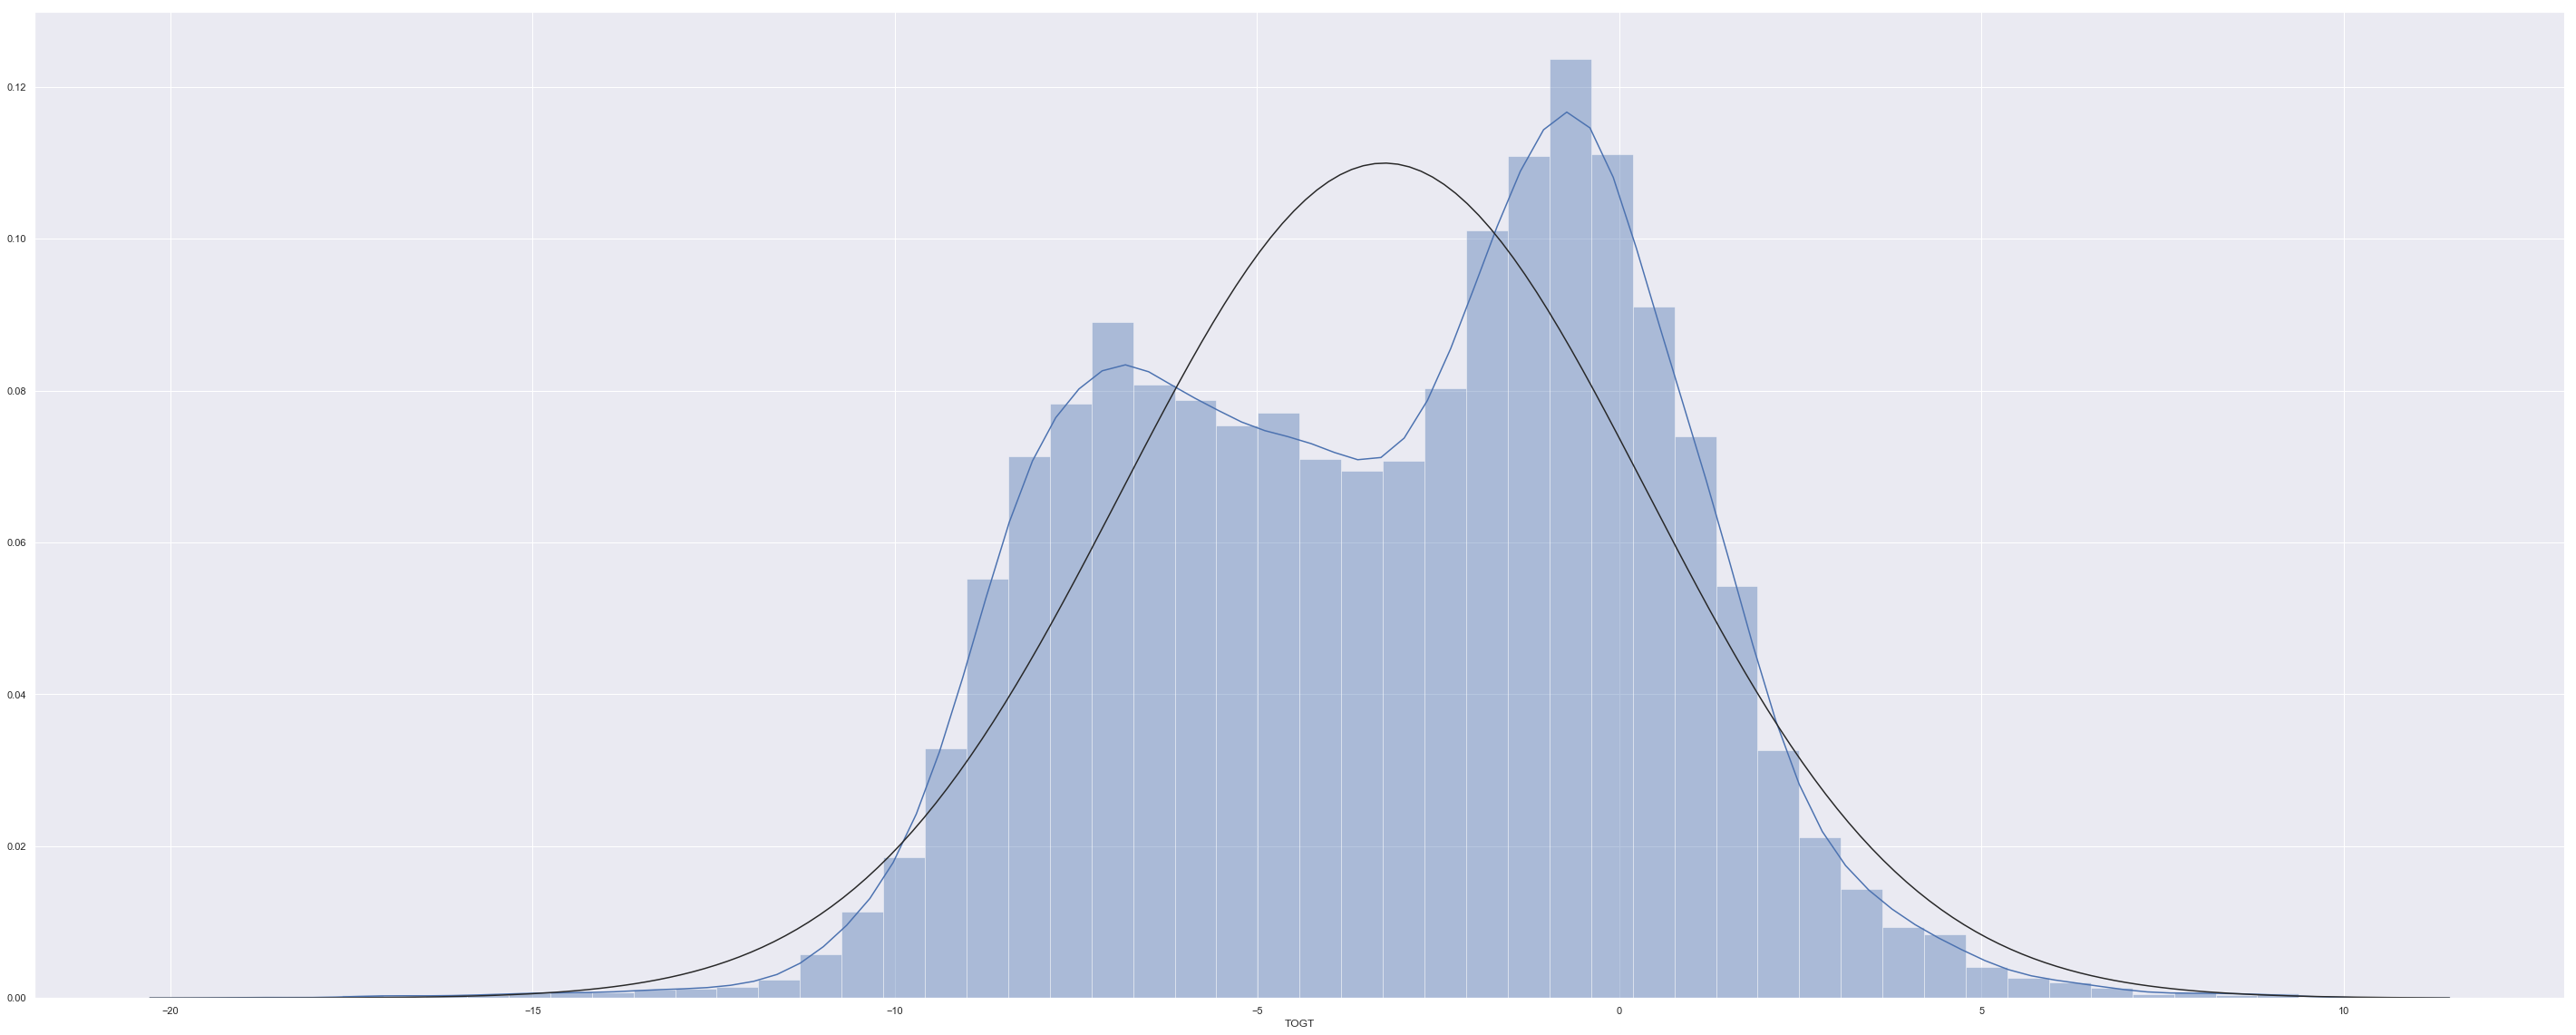

In [53]:
# Simpler way of generating the same image to eyeball it
sns.distplot(togt_log, fit=stats.norm);

#### KS Test on Square Root Normalized TOGT Data: Doesn't Work (makes sense given 4 panel figure plots above)

In [54]:
togt_square_root_data = np.hstack(togt_square_root)
loc, scale = norm.fit(togt_square_root_data)

# create a normal distribution with loc and scale
n_togt_square_root = norm(loc=loc, scale=scale)
togt_square_root_cdf = n_togt_square_root.cdf

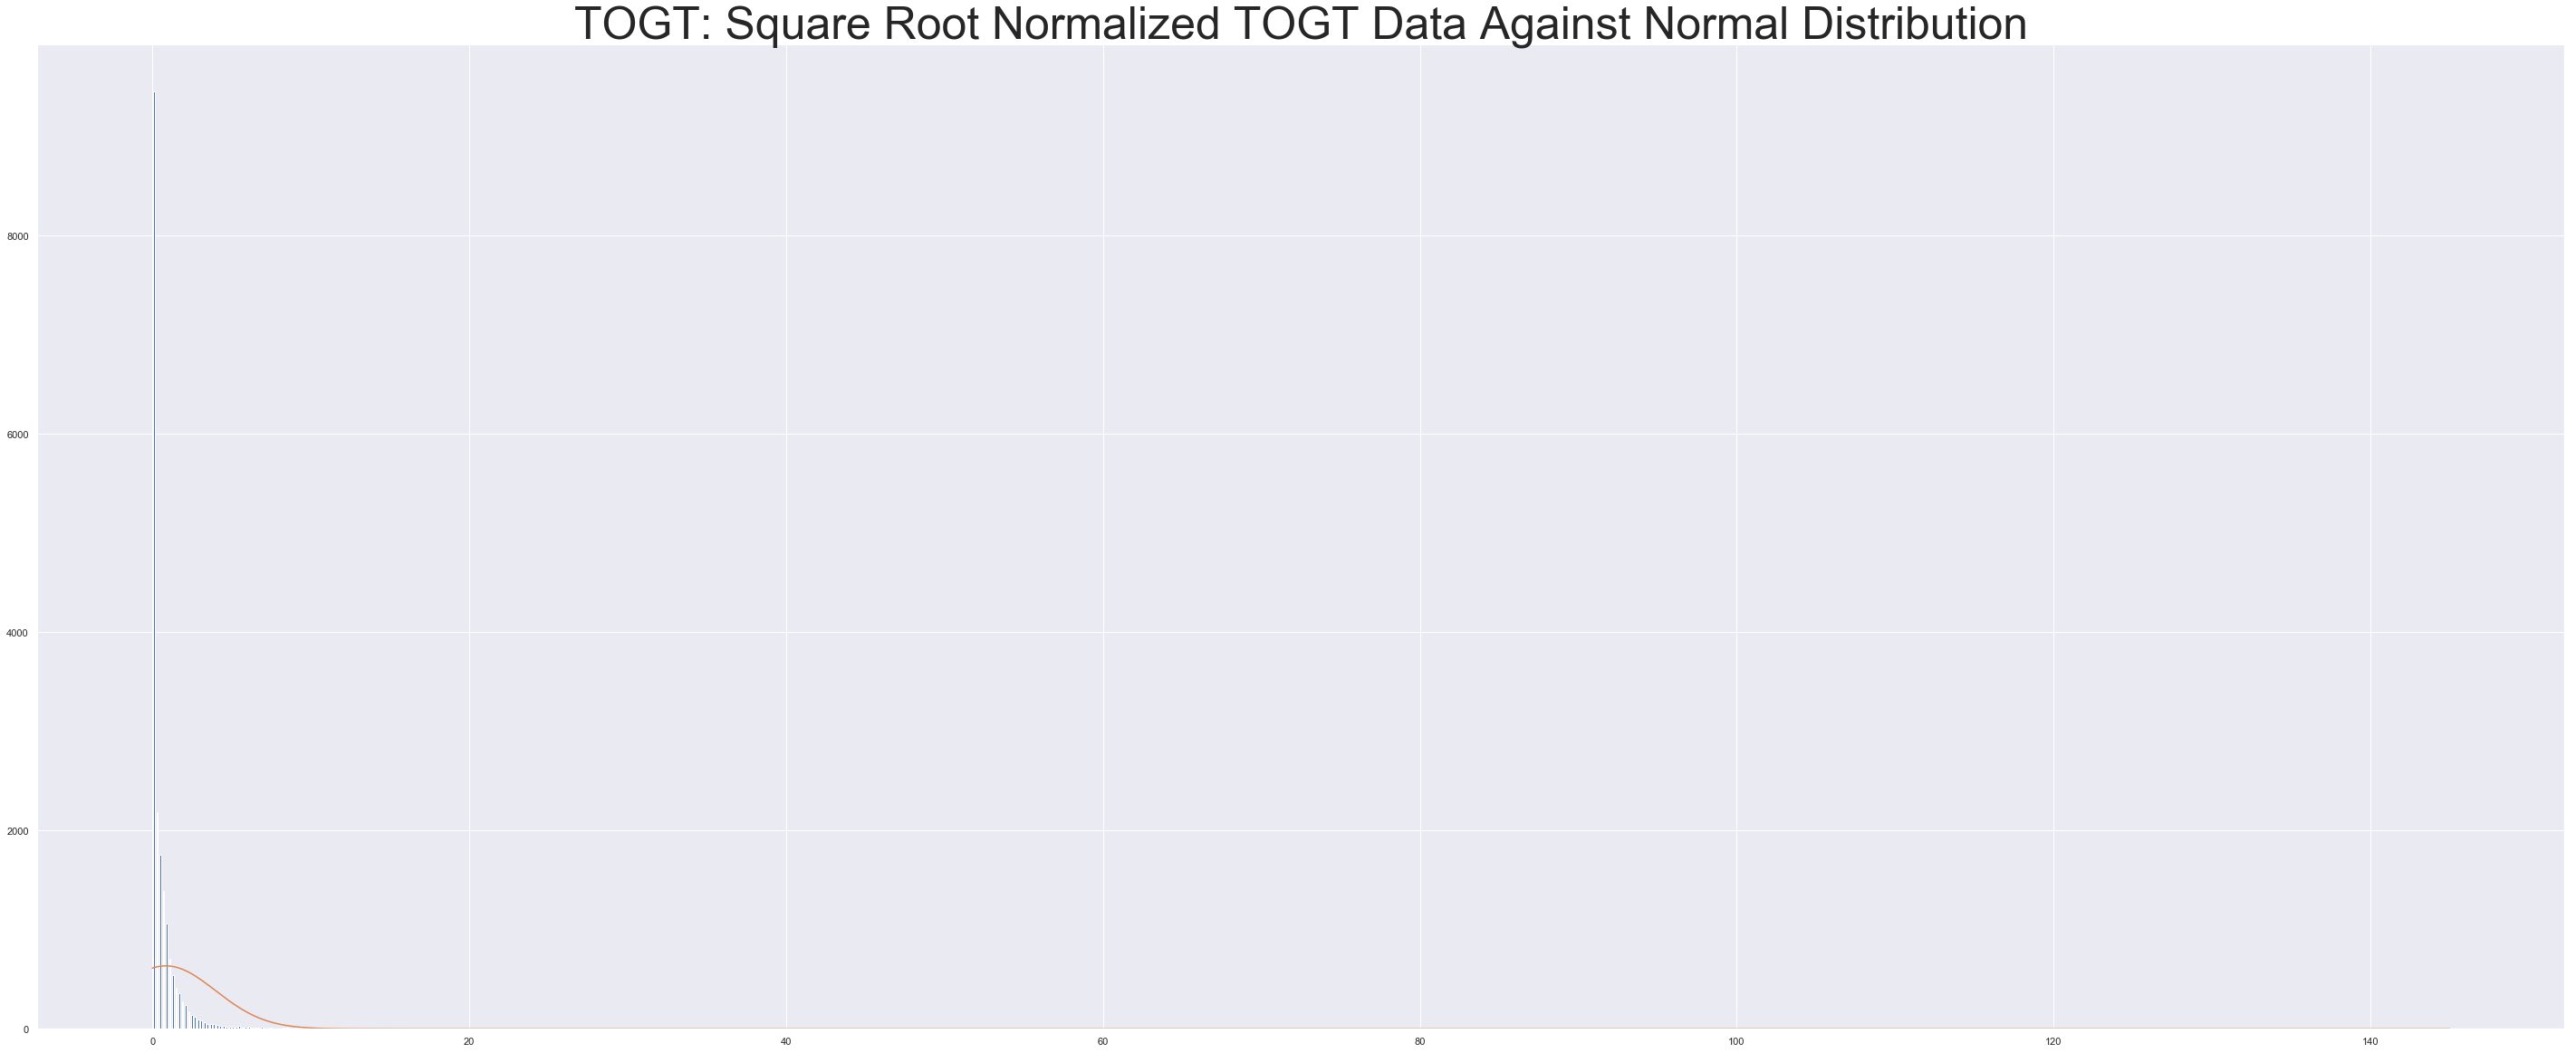

In [55]:
plt.hist(togt_square_root_data, bins=np.arange(togt_square_root_data.min(), togt_square_root_data.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(togt_square_root_data.min(), togt_square_root_data.max()+0.2, 0.2)
plt.plot(x, 5000*n_togt_square_root.pdf(x))
plt.title('TOGT: Square Root Normalized TOGT Data Against Normal Distribution', fontsize='50')
plt.show()

In [56]:
togt_square_root_data_kstest = kstest(togt_square_root_data, togt_square_root_cdf)
togt_square_root_data_kstest

KstestResult(statistic=0.39310512424886856, pvalue=0.0)

#### KS Test on Inverse of Square Root Normalized TOGT Data: Doesn't Work (makes sense given 4 panel figure plots above)

In [59]:
togt_inverse_data = np.hstack(togt_inverse)
loc, scale = norm.fit(togt_inverse_data)

# create a normal distribution with loc and scale
n_togt_inverse = norm(loc=loc, scale=scale)
togt_inverse_cdf = n_togt_inverse.cdf

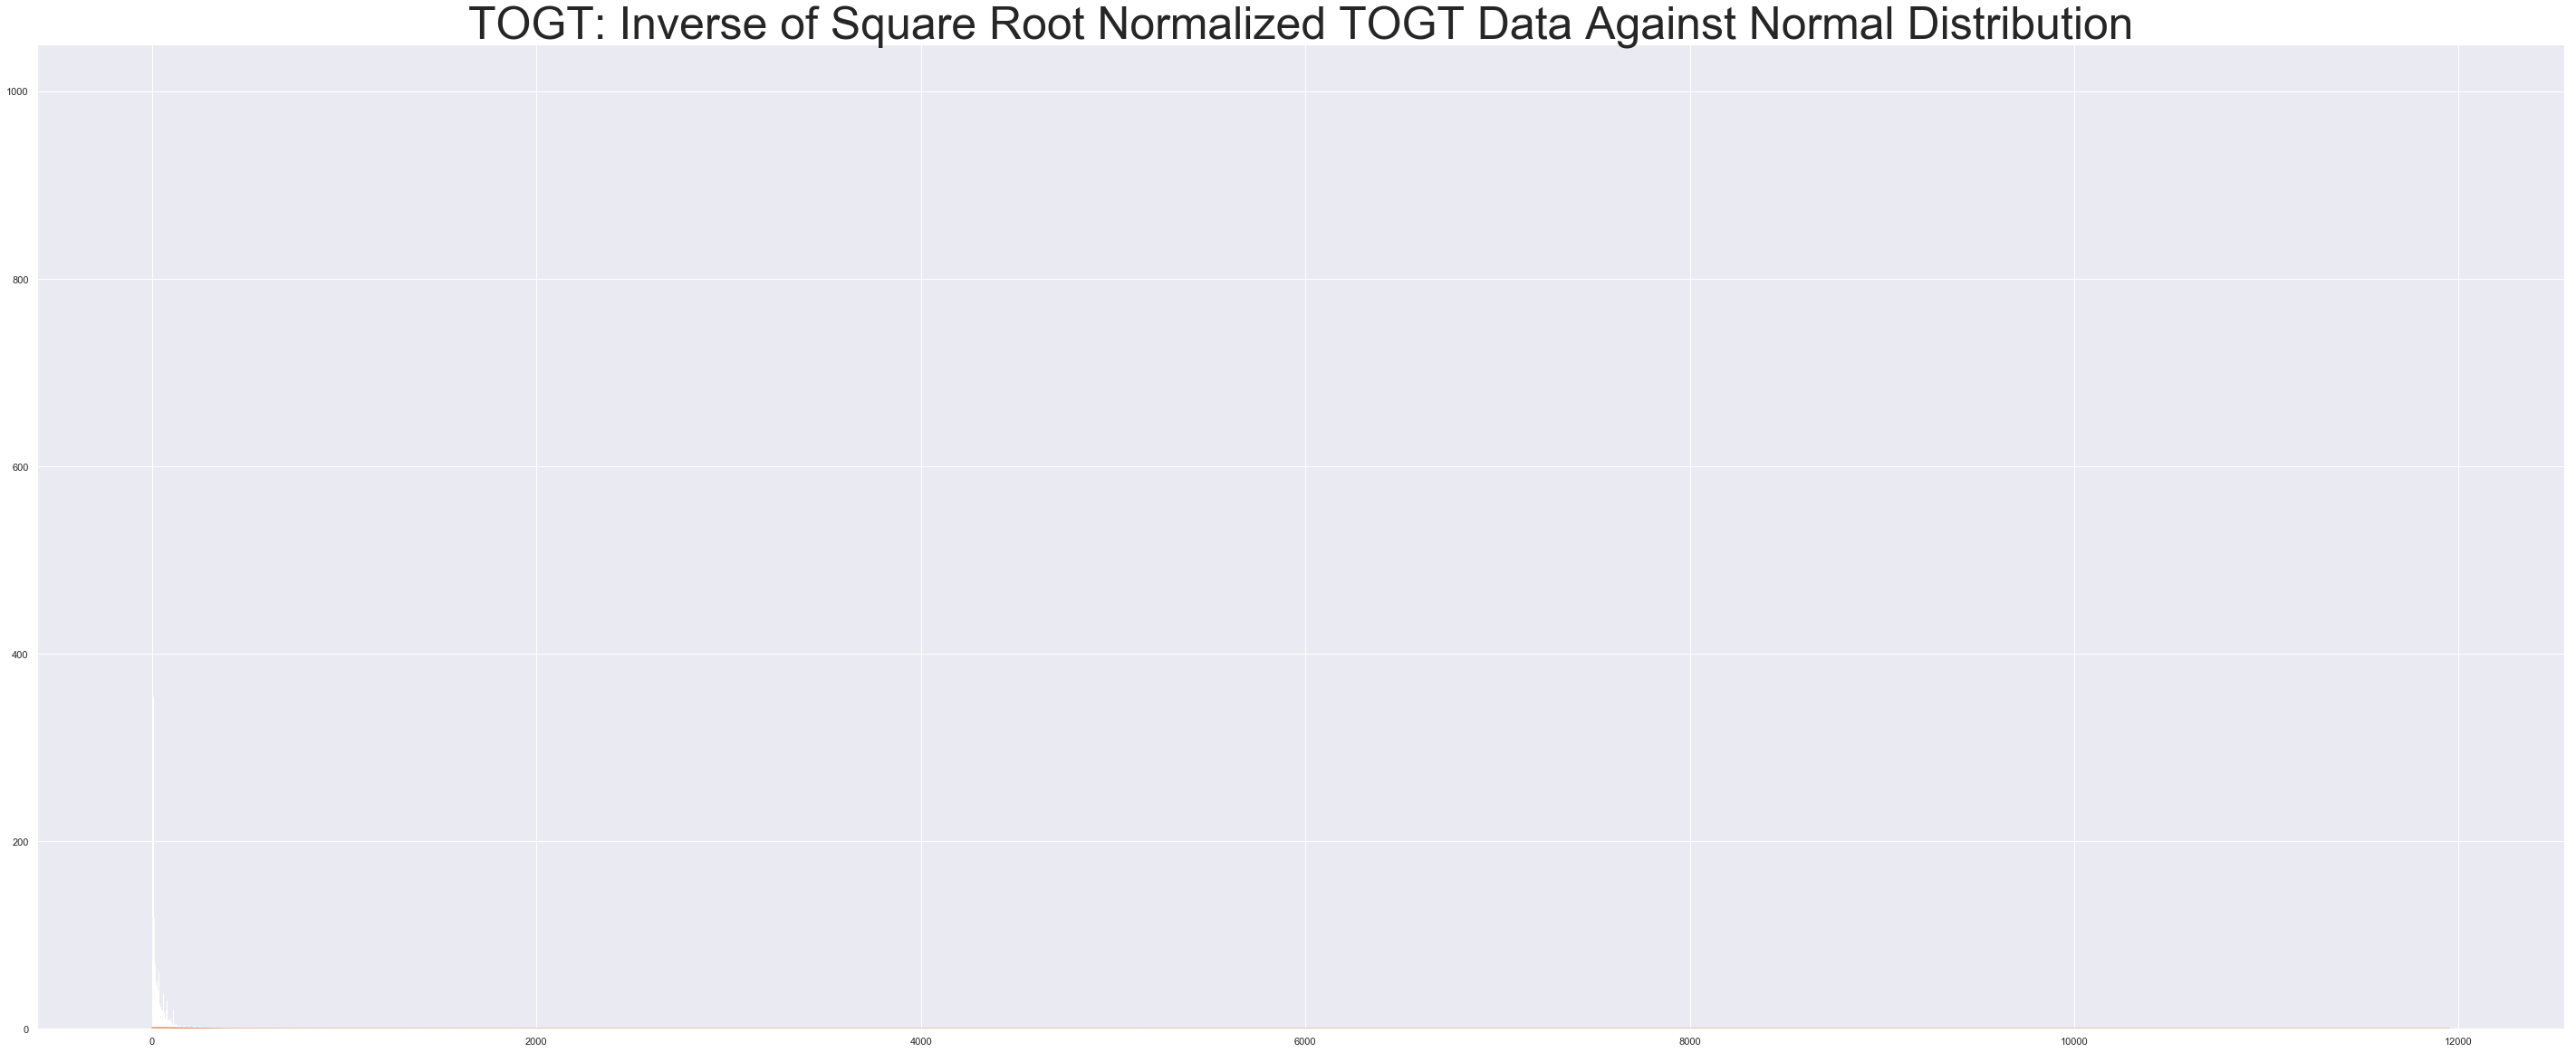

In [60]:
plt.hist(togt_inverse_data, bins=np.arange(togt_inverse_data.min(), togt_inverse_data.max()+0.2, 0.2), rwidth=0.5)
x = np.arange(togt_inverse_data.min(), togt_inverse_data.max()+0.2, 0.2)
plt.plot(x, 500*n_togt_inverse.pdf(x))
plt.title('TOGT: Inverse of Square Root Normalized TOGT Data Against Normal Distribution', fontsize='50')
plt.show()

In [61]:
togt_inverse_data_kstest = kstest(togt_inverse_data, togt_inverse_cdf)
togt_inverse_data_kstest

KstestResult(statistic=0.4393496819935667, pvalue=0.0)

### Kolmogorov-Smirnov Tests for other pollutants (no plots)
Note: had to set each variable's "n" with individual variables. Otherwise, running different variables with the same variable for "n" resulted in changing results that were not dependable.  Write functions to do this more efficiently?

In [62]:
# Set up KS tests for each of other features

# ROGT LOG: create a normal distribution with loc and scale
rogt_log_data = np.hstack(rogt_log)
loc, scale = norm.fit(rogt_log_data)

n_rogt_log = norm(loc=loc, scale=scale)
rogt_log_cdf = n_rogt_log.cdf

# ROGT LOG: KS Test
rogt_log_data_kstest = kstest(rogt_log_data, rogt_log_cdf)

# ROGT SQUARE ROOT: create a normal distribution with loc and scale
rogt_square_root_data = np.hstack(rogt_square_root)
loc, scale = norm.fit(rogt_square_root_data)

n_rogt_square_root = norm(loc=loc, scale=scale)
rogt_square_root_cdf = n_rogt_square_root.cdf

# ROGT SQUARE ROOT: KS Test
rogt_square_root_data_kstest = kstest(rogt_square_root_data, rogt_square_root_cdf)

# ROGT INVERSE OF SQUARE ROOT: create a normal distribution with loc and scale
rogt_inverse_data = np.hstack(rogt_inverse)
loc, scale = norm.fit(rogt_inverse_data)

n_rogt_inverse = norm(loc=loc, scale=scale)
rogt_inverse_cdf = n_rogt_inverse.cdf

# ROGT INVERSE OF SQUARE ROOT: KS Test
rogt_inverse_data_kstest = kstest(rogt_inverse_data, rogt_inverse_cdf)

# COT LOG: create a normal distribution with loc and scale
cot_log_data = np.hstack(cot_log)
loc, scale = norm.fit(cot_log_data)

n_cot_log = norm(loc=loc, scale=scale)
cot_log_cdf = n_cot_log.cdf

# COT LOG: KS Test
cot_log_data_kstest = kstest(cot_log_data, cot_log_cdf)

# COT SQUARE ROOT: create a normal distribution with loc and scale
cot_square_root_data = np.hstack(cot_square_root)
loc, scale = norm.fit(cot_square_root_data)

n_cot_square_root = norm(loc=loc, scale=scale)
cot_square_root_cdf = n_cot_square_root.cdf

# COT SQUARE ROOT: KS Test
cot_square_root_data_kstest = kstest(cot_square_root_data, cot_square_root_cdf)

# COT INVERSE OF SQUARE ROOT: create a normal distribution with loc and scale
cot_inverse_data = np.hstack(cot_inverse)
loc, scale = norm.fit(cot_inverse_data)

n_cot_inverse = norm(loc=loc, scale=scale)
cot_inverse_cdf = n_cot_inverse.cdf

# COT INVERSE OF SQUARE ROOT: KS Test
cot_inverse_data_kstest = kstest(cot_inverse_data, rogt_inverse_cdf)

# NOXT LOG: create a normal distribution with loc and scale
noxt_log_data = np.hstack(noxt_log)
loc, scale = norm.fit(noxt_log_data)

n_noxt_log = norm(loc=loc, scale=scale)
noxt_log_cdf = n_noxt_log.cdf

# NOXT LOG: KS Test
noxt_log_data_kstest = kstest(noxt_log_data, noxt_log_cdf)

# NOXT SQUARE ROOT: create a normal distribution with loc and scale
noxt_square_root_data = np.hstack(noxt_square_root)
loc, scale = norm.fit(noxt_square_root_data)

n_noxt_square_root = norm(loc=loc, scale=scale)
noxt_square_root_cdf = n_noxt_square_root.cdf

# NOXT SQUARE ROOT: KS Test
noxt_square_root_data_kstest = kstest(noxt_square_root_data, noxt_square_root_cdf)

# NOXT INVERSE OF SQUARE ROOT: create a normal distribution with loc and scale
noxt_inverse_data = np.hstack(noxt_inverse)
loc, scale = norm.fit(noxt_inverse_data)

n_noxt_inverse = norm(loc=loc, scale=scale)
noxt_inverse_cdf = n_noxt_inverse.cdf

# NOXT INVERSE OF SQUARE ROOT: KS Test
noxt_inverse_data_kstest = kstest(noxt_inverse_data, noxt_inverse_cdf)

# SOXT LOG: create a normal distribution with loc and scale
soxt_log_data = np.hstack(soxt_log)
loc, scale = norm.fit(soxt_log_data)

n_soxt_log = norm(loc=loc, scale=scale)
soxt_log_cdf = n_soxt_log.cdf

# SOXT LOG: KS Test
soxt_log_data_kstest = kstest(soxt_log_data, soxt_log_cdf)

# SOXT SQUARE ROOT: create a normal distribution with loc and scale
soxt_square_root_data = np.hstack(soxt_square_root)
loc, scale = norm.fit(soxt_square_root_data)

n_soxt_square_root = norm(loc=loc, scale=scale)
soxt_square_root_cdf = n_soxt_square_root.cdf

# SOXT SQUARE ROOT: KS Test
soxt_square_root_data_kstest = kstest(soxt_square_root_data, soxt_square_root_cdf)

# SOXT INVERSE OF SQUARE ROOT: create a normal distribution with loc and scale
soxt_inverse_data = np.hstack(soxt_inverse)
loc, scale = norm.fit(soxt_inverse_data)

n_soxt_inverse = norm(loc=loc, scale=scale)
soxt_inverse_cdf = n_soxt_inverse.cdf

# SOXT INVERSE OF SQUARE ROOT: KS Test
soxt_inverse_data_kstest = kstest(soxt_inverse_data, soxt_inverse_cdf)

# PMT LOG: create a normal distribution with loc and scale
pmt_log_data = np.hstack(pmt_log)
loc, scale = norm.fit(pmt_log_data)

n_pmt_log = norm(loc=loc, scale=scale)
pmt_log_cdf = n_pmt_log.cdf

# PMT LOG: KS Test
pmt_log_data_kstest = kstest(pmt_log_data, pmt_log_cdf)

# PMT SQUARE ROOT: create a normal distribution with loc and scale
pmt_square_root_data = np.hstack(pmt_square_root)
loc, scale = norm.fit(pmt_square_root_data)

n_pmt_square_root = norm(loc=loc, scale=scale)
pmt_square_root_cdf = n_pmt_square_root.cdf

# PMT SQUARE ROOT: KS Test
pmt_square_root_data_kstest = kstest(pmt_square_root_data, pmt_square_root_cdf)

# PMT INVERSE OF SQUARE ROOT: create a normal distribution with loc and scale
pmt_inverse_data = np.hstack(pmt_inverse)
loc, scale = norm.fit(pmt_inverse_data)

n_pmt_inverse = norm(loc=loc, scale=scale)
pmt_inverse_cdf = n_pmt_inverse.cdf

# PMT INVERSE OF SQUARE ROOT: KS Test
pmt_inverse_data_kstest = kstest(pmt_inverse_data, pmt_inverse_cdf)

### Kolmogorov-Smirnov Test: Log normalized data performs best overall

In [63]:
# TOGT
# Perform test KS test against a cumulative distribution function
print('KS Test - TOGT:')
print('Log: ', togt_log_data_kstest)
print('Square root: ', togt_square_root_data_kstest)
print('Inverse of Square Root: ', togt_inverse_data_kstest)
print()

print('KS Test - ROGT:')
print('Log: ', rogt_log_data_kstest)
print('Square root: ', rogt_square_root_data_kstest)
print('Inverse of Square Root: ', rogt_inverse_data_kstest)
print()

print('KS Test - COT:')
print('Log: ', cot_log_data_kstest)
print('Square root: ', cot_square_root_data_kstest)
print('Inverse of Square Root: ', cot_inverse_data_kstest)
print()

print('KS Test - NOXT:')
print('Log: ', noxt_log_data_kstest)
print('Square root: ', noxt_square_root_data_kstest)
print('Inverse of Square Root: ', noxt_inverse_data_kstest)
print()

print('KS Test - SOXT:')
print('Log: ', soxt_log_data_kstest)
print('Square root: ', soxt_square_root_data_kstest)
print('Inverse of Square Root: ', soxt_inverse_data_kstest)
print()

print('KS Test - PMT:')
print('Log: ', pmt_log_data_kstest)
print('Square root: ', pmt_square_root_data_kstest)
print('Inverse of Square Root: ', pmt_inverse_data_kstest)
print()


KS Test - TOGT:
Log:  KstestResult(statistic=0.06470538932007674, pvalue=1.7896313674620378e-72)
Square root:  KstestResult(statistic=0.39310512424886856, pvalue=0.0)
Inverse of Square Root:  KstestResult(statistic=0.4393496819935667, pvalue=0.0)

KS Test - ROGT:
Log:  KstestResult(statistic=0.07487233223559042, pvalue=6.054272317897984e-96)
Square root:  KstestResult(statistic=0.31854659130335183, pvalue=0.0)
Inverse of Square Root:  KstestResult(statistic=0.4414331149261488, pvalue=0.0)

KS Test - COT:
Log:  KstestResult(statistic=0.0902443175716261, pvalue=4.4404662208631676e-90)
Square root:  KstestResult(statistic=0.38501256357149294, pvalue=0.0)
Inverse of Square Root:  KstestResult(statistic=0.4414173611148967, pvalue=0.0)

KS Test - NOXT:
Log:  KstestResult(statistic=0.06932791526228044, pvalue=1.9600850035053453e-54)
Square root:  KstestResult(statistic=0.36916380733852594, pvalue=0.0)
Inverse of Square Root:  KstestResult(statistic=0.47793461313676305, pvalue=0.0)

KS Test - 

## Method 2: PCA Analysis

### 1. Covariance Matrix 1: Simpler

In [92]:
# 1. Doing the PCA- LoWa style

# Get a subset of the data (SF and SD air basins only)
df_pca = df.loc[
    (df['AB'] == 'SF') | (df['AB'] == 'SD'),
    ['TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']
].dropna()


#Scale the values and normalize data - puts all the numbers between 0 and 1 so you can fairly compare
# (so PCA doesn't lean toward variables that have large outliers)
X = StandardScaler().fit_transform(df_pca)

# Instantiate the PCA model
pca = PCA(n_components=6)

# Fit the model to the data
pca.fit(X);

#### Individual component variance:

Individual Component Covariance Matrix: How much of the result each variable explains
 [0.57867964 0.22729506 0.08612745 0.05445543 0.03770911 0.01573331]



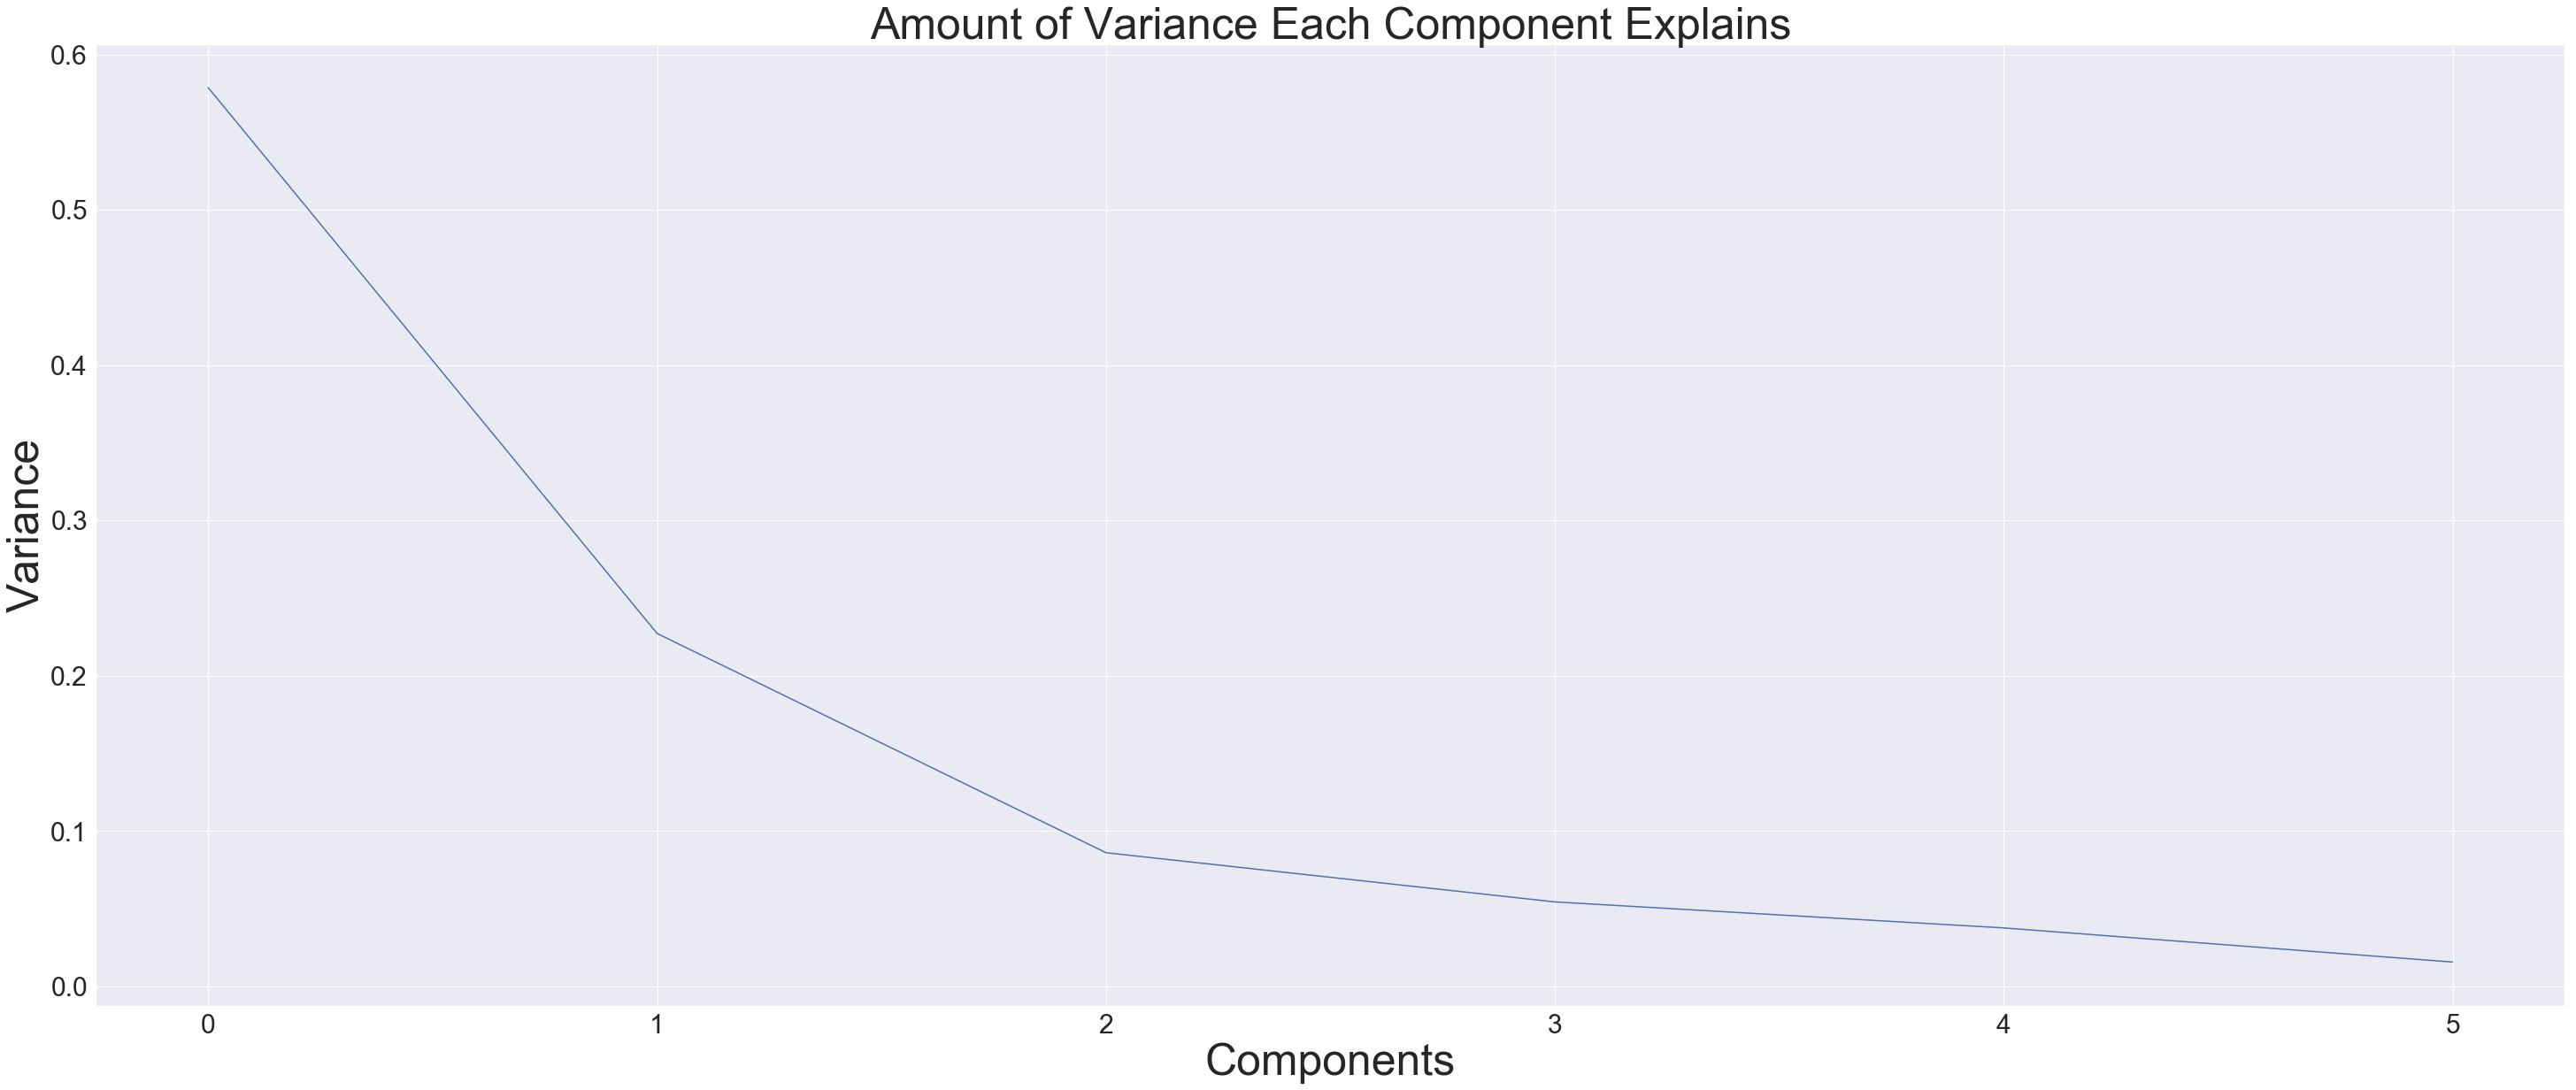

In [95]:
#The amount of variance that each Pricipal Component explains
amount_variance_each = pca.explained_variance_ratio_

# how much each variable explains - #1: .57, #2: .22...
print('Individual Component Covariance Matrix: How much of the result each variable explains\n', amount_variance_each)
print()

# Add title and labels
plt.title('Amount of Variance Each Component Explains', fontsize='50')
plt.xlabel('Components', fontsize='50')
plt.ylabel('Variance', fontsize='50')

# Change fontsize of ticks label
# https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)


plt.plot(amount_variance_each);

#### Cumulative component variance:

Cumulative Covariance Matrix: How much the result cumulative variance explains
 (doesn't say which combination of variables explain result) 
 [ 57.87  80.6   89.21  94.66  98.43 100.  ]


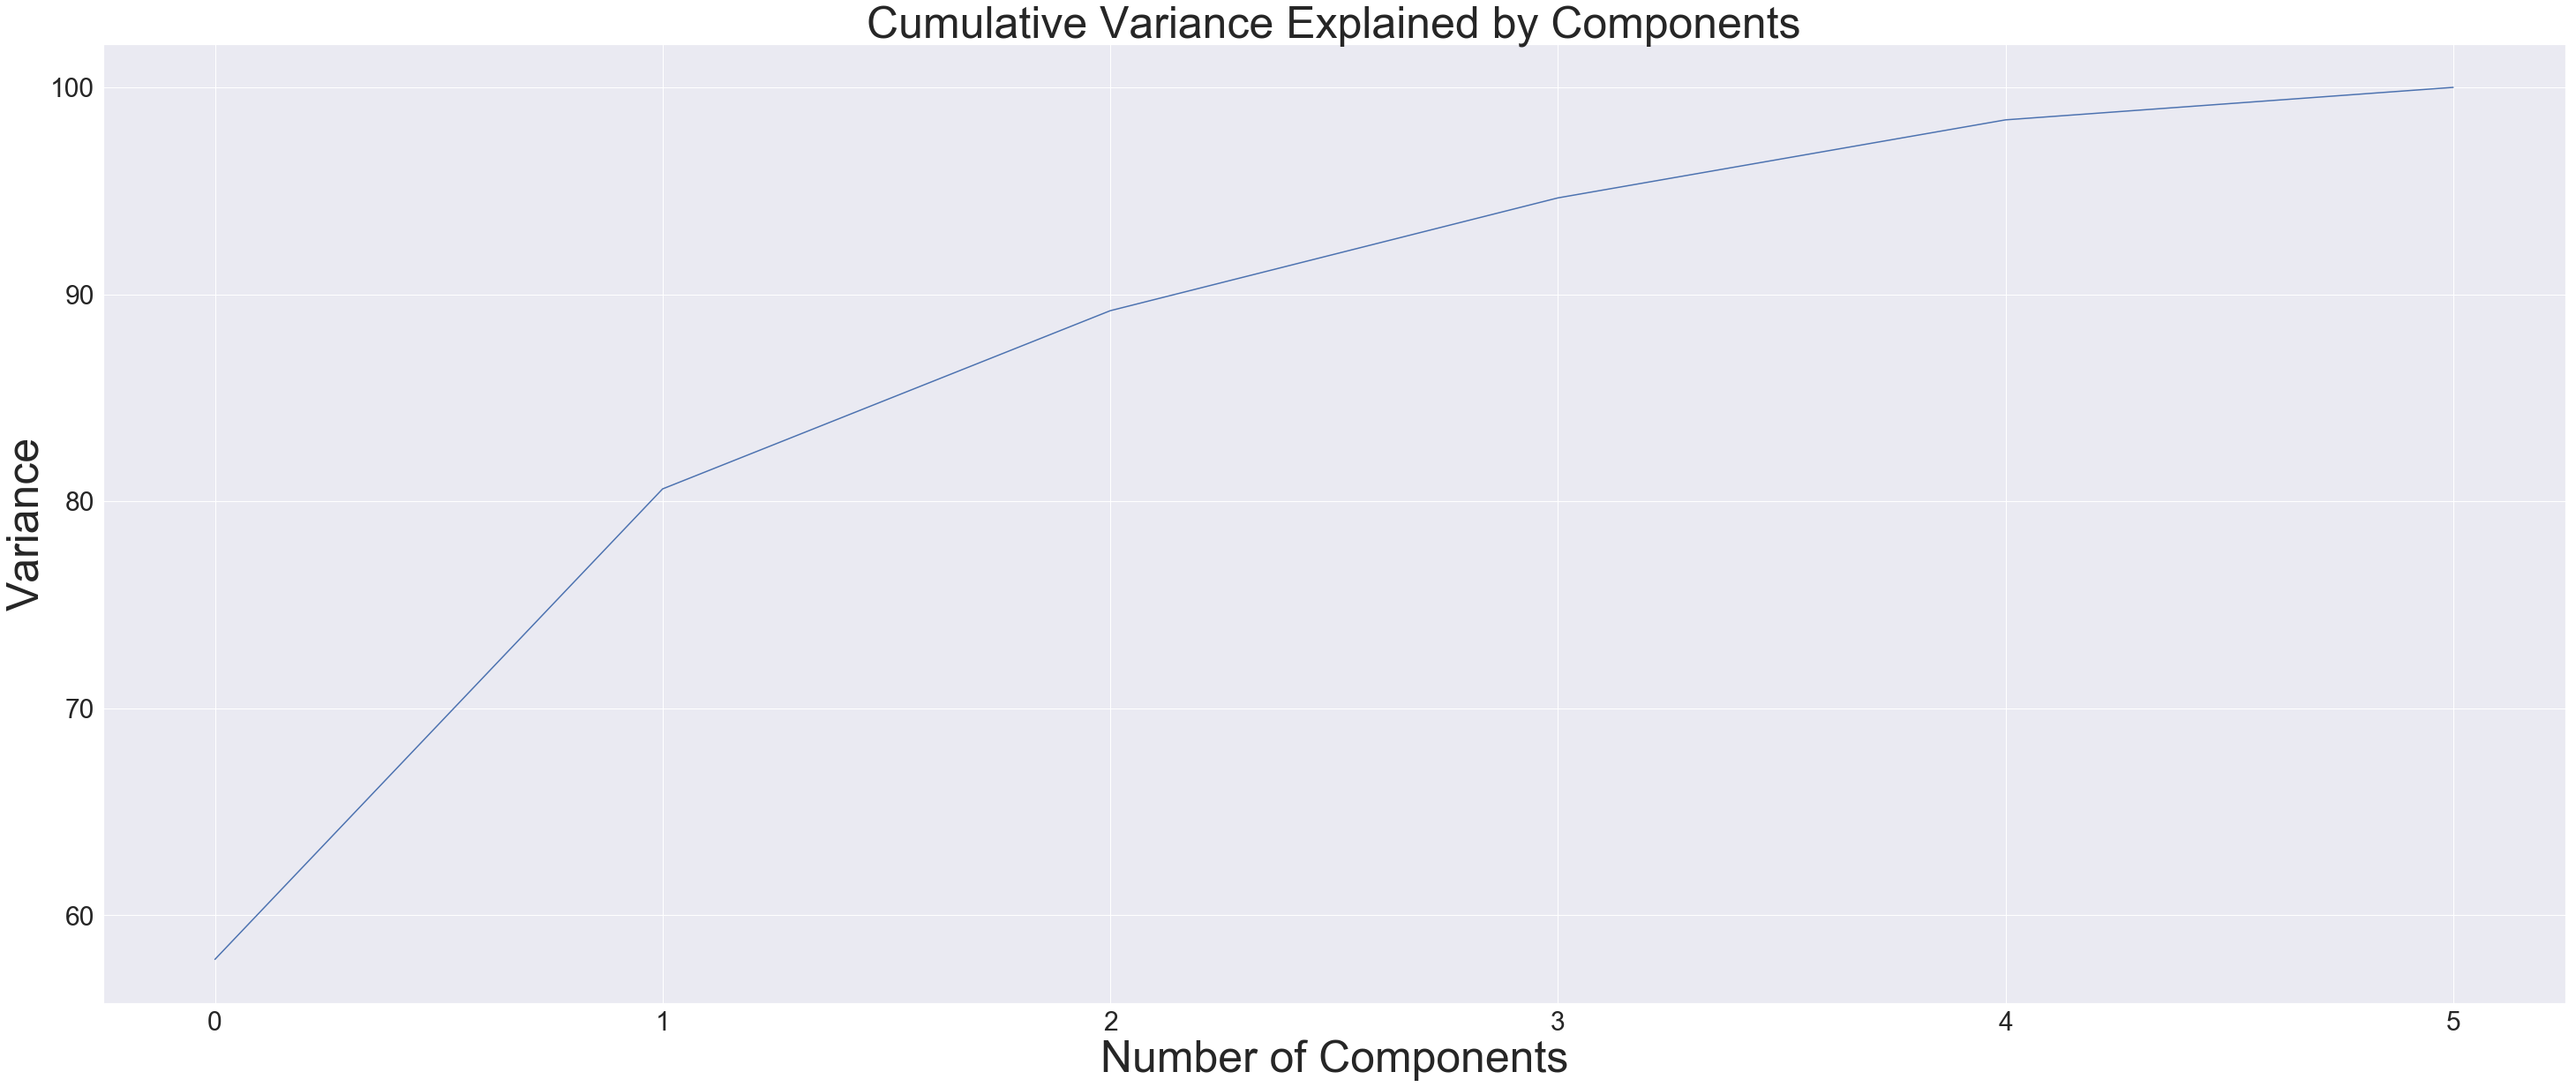

In [97]:
# Cumulative variance:

amount_variance_cumulative =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# if you keep one variable 57.87, if you keep two variables, you get 80.6 - but doesn't tell me which two variables
print('Cumulative Covariance Matrix: How much the result cumulative variance explains\n (doesn\'t say which combination of variables explain result) \n', amount_variance_cumulative)

# Do a scatterplot at end to see which variables are ones that explain result

# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='50')
plt.xlabel('Number of Components', fontsize='50')
plt.ylabel('Variance', fontsize='50')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)


plt.plot(amount_variance_cumulative);


### 1. Covariance Matrix 2: Thinkful version

Covariance Matrix:
 [[1.00019033 0.24003129 0.12020223 0.09196442 0.05865587 0.60370535]
 [0.24003129 1.00019033 0.64894906 0.6879297  0.45756754 0.60523493]
 [0.12020223 0.64894906 1.00019033 0.89837726 0.68997686 0.40908675]
 [0.09196442 0.6879297  0.89837726 1.00019033 0.73457478 0.40745292]
 [0.05865587 0.45756754 0.68997686 0.73457478 1.00019033 0.31864792]
 [0.60370535 0.60523493 0.40908675 0.40745292 0.31864792 1.00019033]]


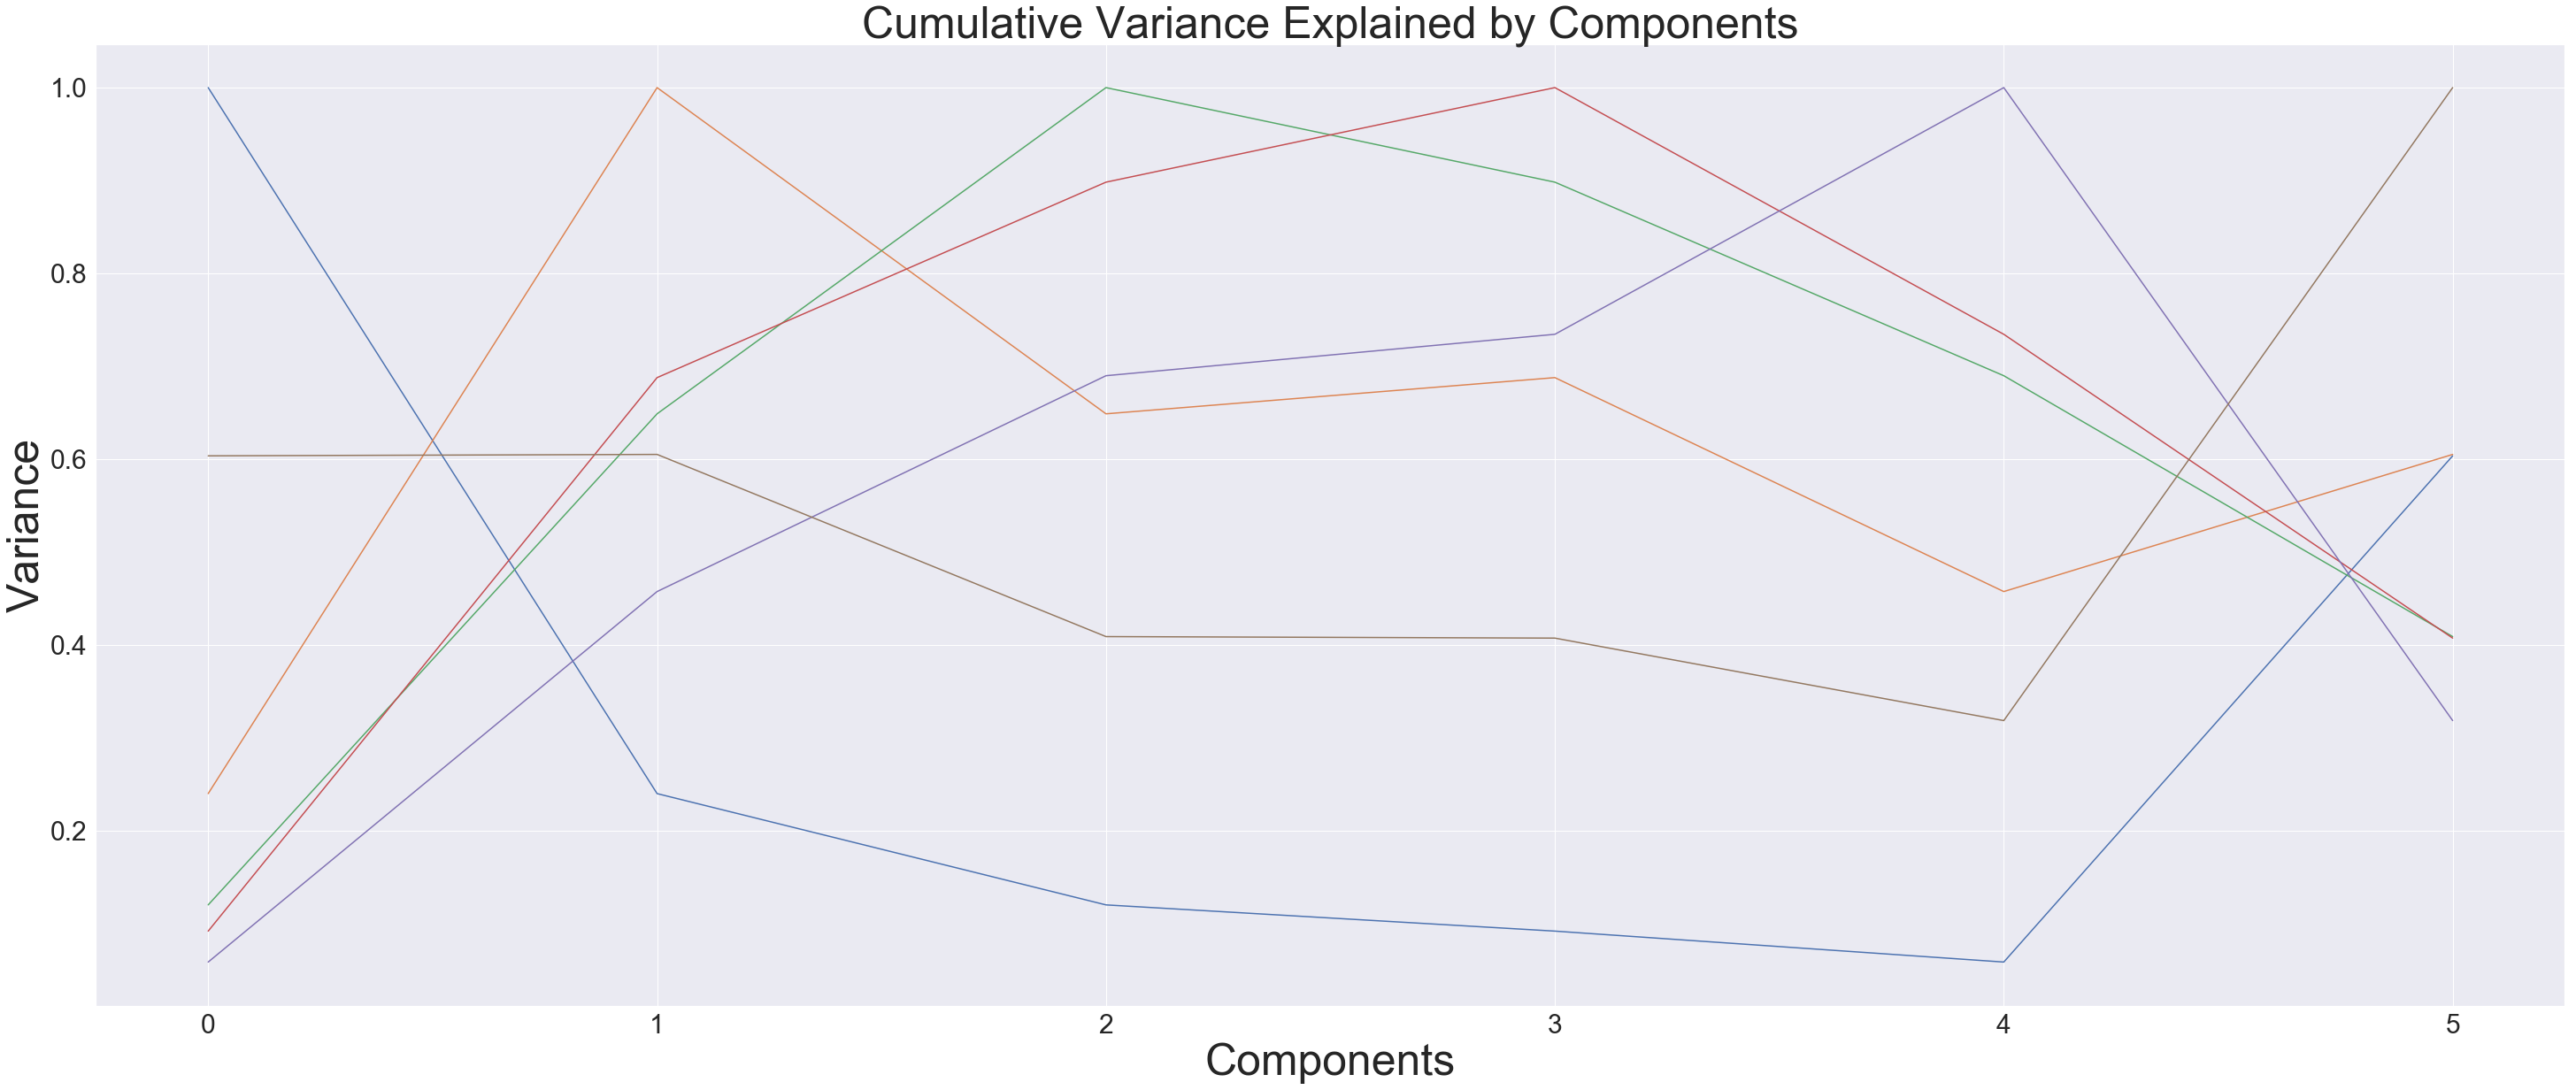

In [113]:
# Doing the PCA- Thinkful version

# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = df.loc[
    (df['AB'] == 'SF') | (df['AB'] == 'SD'),
    ['TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']
].dropna()

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='50')
plt.xlabel('Components', fontsize='50')
plt.ylabel('Variance', fontsize='50')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)
plt.plot(Cx);

### 3. Eigenvalues and Eigenvectors

In [114]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T
    print()
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print()
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print()
    print(40 * '-')

print()
print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)


Eigenvector 1: 
[[0.18360553]
 [0.44445307]
 [0.47787999]
 [0.48675144]
 [0.41173387]
 [0.36596372]]

Eigenvalue 1: 3.4727386582122852

----------------------------------------

Eigenvector 2: 
[[ 0.72171045]
 [ 0.07462281]
 [-0.23146614]
 [-0.25629095]
 [-0.2918526 ]
 [ 0.51877345]]

Eigenvalue 2: 1.3640299473974613

----------------------------------------

Eigenvector 3: 
[[ 0.43775738]
 [-0.66348326]
 [ 0.04634512]
 [ 0.0176592 ]
 [ 0.58443008]
 [-0.15537116]]

Eigenvalue 3: 0.5168630621742207

----------------------------------------

Eigenvector 4: 
[[ 0.40148267]
 [-0.05027761]
 [ 0.45135169]
 [ 0.28934318]
 [-0.53779611]
 [-0.50953051]]

Eigenvalue 4: 0.32679478699086434

----------------------------------------

Eigenvector 5: 
[[-0.30387666]
 [-0.58285353]
 [ 0.36943759]
 [ 0.13423794]
 [-0.31901568]
 [ 0.55827035]]

Eigenvalue 5: 0.22629771766461795

----------------------------------------

Eigenvector 6: 
[[-0.01619099]
 [ 0.1201532 ]
 [ 0.61294681]
 [-0.77158074]
 [ 0.11

### 4. Determine number of components to use (and which components): Scree Plot
Rule used to determine number of components: Keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically, also called the "elbow"

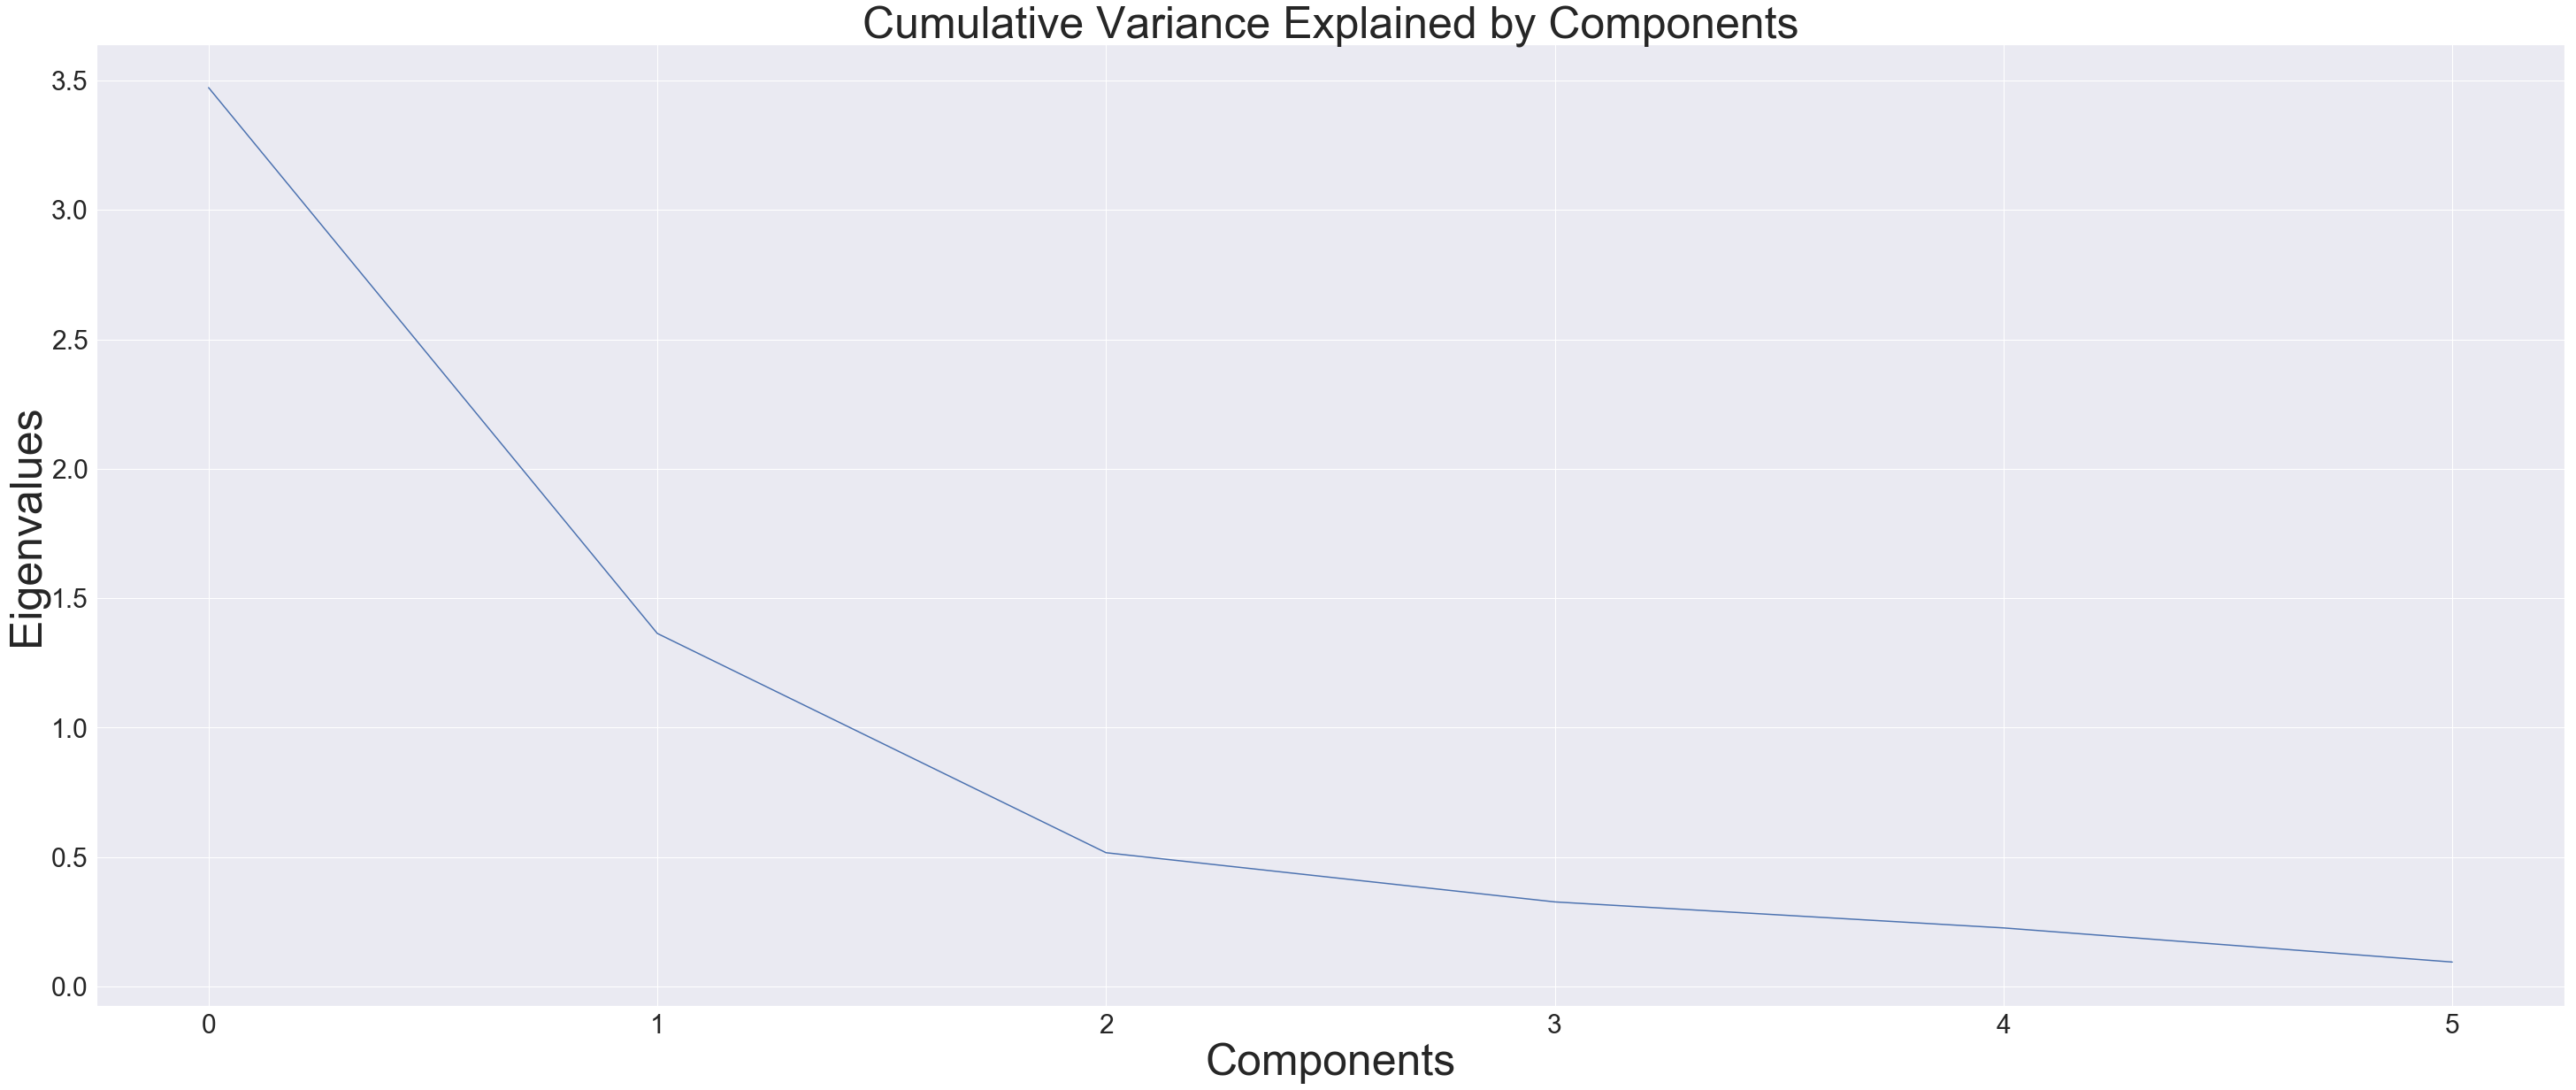

In [115]:
# Add title and labels
plt.title('Cumulative Variance Explained by Components', fontsize='50')
plt.xlabel('Components', fontsize='50')
plt.ylabel('Eigenvalues', fontsize='50')

# Change  fontsize of ticks label 
plt.tick_params(axis='both', which='major', labelsize=30)
plt.tick_params(axis='both', which='minor', labelsize=30)

plt.plot(eig_val_cov)
plt.show()

###  5. Check how well new component correlates with old variables


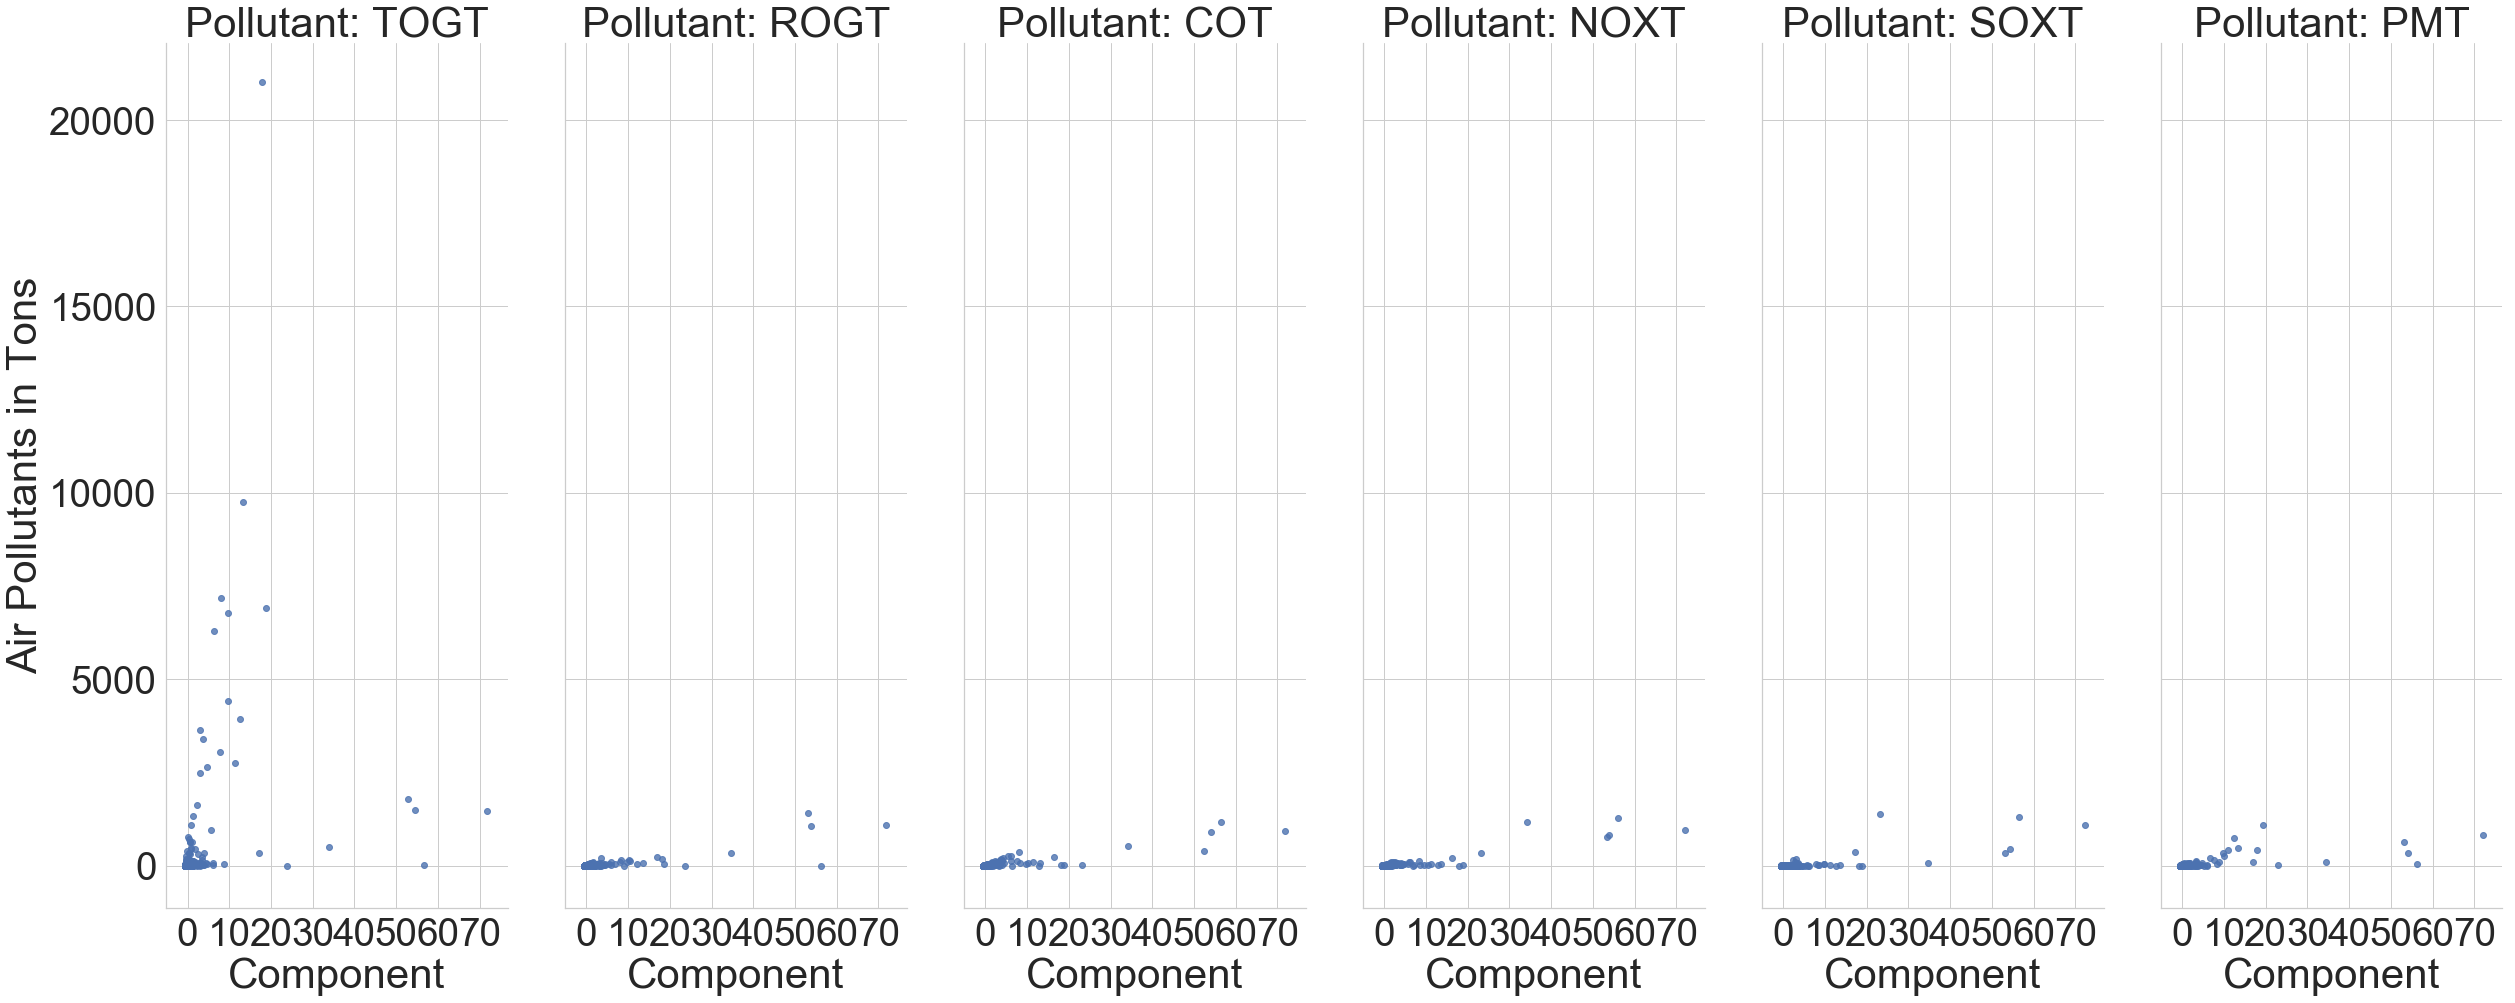

In [128]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['TOGT', 'ROGT', 'COT', 'NOXT', 'SOXT', 'PMT']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

with plt.rc_context(dict(sns.axes_style("whitegrid"),
                         **sns.plotting_context("notebook", font_scale=3.5))):
    g = sns.FacetGrid(data_to_plot, col="variable", height=15, aspect=.4)
    g = (g.map(sns.regplot, "Component", "value", x_jitter=.49, y_jitter=.49, fit_reg=False)
         .set_titles("Pollutant: {col_name}") 
         .set_axis_labels("Component", "Air Pollutants in Tons")
        )
    
plt.show()


In [127]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.57867964 0.22729506 0.08612745 0.05445543]
